# Variant calling benchmarks
Used hap.py for benchmarking with rtg vcfeval engine
Strafication using GIAB v3.5

PacBio HiFi reads with DeepVariant calls used as truthset


In [206]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pathlib import Path

run_names = {
    "aviti_ngi": "AVITI CB FS",
    "aviti_hq": "AVITI CB",
    "xplus_sns": "NovaSeqX+",
}

custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.1)

basedir = Path("../analysis/variant_call_benchmarking")

# For SVG output
plt.rcParams['svg.fonttype'] = 'none'
figdir = Path("../figures/svg")

In [3]:
%load_ext watermark

In [4]:
%watermark

Last updated: 2025-02-19T13:56:46.828610+01:00

Python implementation: CPython
Python version       : 3.12.6
IPython version      : 8.28.0

Compiler    : Clang 17.0.6 
OS          : Darwin
Release     : 24.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 11
Architecture: 64bit



In [5]:
%watermark -iv

numpy     : 2.1.1
matplotlib: 3.9.2
seaborn   : 0.13.2
pandas    : 2.2.3



## Filter Counts

In [207]:
data = pd.read_csv(basedir / "count_filters/aggregate_filters_mqc.txt", sep="\t", comment="#")
data["Data source"] = data["run"].replace(run_names)
data["Cell line"] = data["cell"]
data["Total"] = data["RefCall"] + data["PASS"]
data["pctRefCall"] = 100 * data["RefCall"] / data["Total"]
data

run     cell  cov  RefCall    PASS  Data source Cell line   Total  \
0    aviti_hq  KMS12BM   10    38932  104943     AVITI CB   KMS12BM  143875   
1    aviti_hq  KMS12BM   15    52567  108236     AVITI CB   KMS12BM  160803   
2    aviti_hq  KMS12BM   20    57589  108473     AVITI CB   KMS12BM  166062   
3    aviti_hq  KMS12BM   25    59504  108409     AVITI CB   KMS12BM  167913   
4    aviti_hq  KMS12BM   30    61360  108202     AVITI CB   KMS12BM  169562   
5    aviti_hq  KMS12BM   40    63766  108011     AVITI CB   KMS12BM  171777   
6    aviti_hq  KMS12BM   50    65539  107932     AVITI CB   KMS12BM  173471   
7    aviti_hq     MM1S   10    40801  125016     AVITI CB      MM1S  165817   
8    aviti_hq     MM1S   15    54260  129332     AVITI CB      MM1S  183592   
9    aviti_hq     MM1S   20    60490  129653     AVITI CB      MM1S  190143   
10   aviti_hq     MM1S   25    62708  129519     AVITI CB      MM1S  192227   
11   aviti_hq     MM1S   30    64263  129403     AVITI CB      MM1S  193666   
12   aviti_hq     MM1S   40    66525  129378     AVITI CB      MM1S  195903   
13   aviti_hq     MM1S   50    67665  129392     AVITI CB      MM1S  197057   
14   aviti_hq     OPM2   10    39792  101085     AVITI CB      OPM2  140877   
15   aviti_hq     OPM2   15    54052  104783     AVITI CB      OPM2  158835   
16   aviti_hq     OPM2   20    59613  105493     AVITI CB      OPM2  165106   
17   aviti_hq     OPM2   25    62071  105540     AVITI CB      OPM2  167611   
18   aviti_hq     OPM2   30    64045  105403     AVITI CB      OPM2  169448   
19   aviti_hq     OPM2   40    66435  105058     AVITI CB      OPM2  171493   
20   aviti_hq     OPM2   50    68072  104938     AVITI CB      OPM2  173010   
21  aviti_ngi  KMS12BM   10    34440  105329  AVITI CB FS   KMS12BM  139769   
22  aviti_ngi  KMS12BM   15    44574  108512  AVITI CB FS   KMS12BM  153086   
23  aviti_ngi  KMS12BM   20    50050  108670  AVITI CB FS   KMS12BM  158720   
24  aviti_ngi     MM1S   10    36165  125318  AVITI CB FS      MM1S  161483   
25  aviti_ngi     MM1S   15    47018  129318  AVITI CB FS      MM1S  176336   
26  aviti_ngi     OPM2   10    34307  101505  AVITI CB FS      OPM2  135812   
27  aviti_ngi     OPM2   15    45276  104938  AVITI CB FS      OPM2  150214   
28  aviti_ngi     OPM2   20    50785  105709  AVITI CB FS      OPM2  156494   
29  xplus_sns  KMS12BM   10    77186  104614    NovaSeqX+   KMS12BM  181800   
30  xplus_sns  KMS12BM   15   107239  107882    NovaSeqX+   KMS12BM  215121   
31  xplus_sns  KMS12BM   20   106910  108233    NovaSeqX+   KMS12BM  215143   
32  xplus_sns  KMS12BM   25   102225  107965    NovaSeqX+   KMS12BM  210190   
33  xplus_sns  KMS12BM   30    97787  107827    NovaSeqX+   KMS12BM  205614   
34  xplus_sns  KMS12BM   40    90907  107843    NovaSeqX+   KMS12BM  198750   
35  xplus_sns  KMS12BM   50    87098  107685    NovaSeqX+   KMS12BM  194783   
36  xplus_sns     MM1S   10    79293  124260    NovaSeqX+      MM1S  203553   
37  xplus_sns     MM1S   15   110136  128858    NovaSeqX+      MM1S  238994   
38  xplus_sns     MM1S   20   110615  129278    NovaSeqX+      MM1S  239893   
39  xplus_sns     MM1S   25   105136  129109    NovaSeqX+      MM1S  234245   
40  xplus_sns     MM1S   30   101246  128992    NovaSeqX+      MM1S  230238   
41  xplus_sns     MM1S   40    93605  129020    NovaSeqX+      MM1S  222625   
42  xplus_sns     MM1S   50    89846  129105    NovaSeqX+      MM1S  218951   
43  xplus_sns     OPM2   10    76250  100584    NovaSeqX+      OPM2  176834   
44  xplus_sns     OPM2   15   104044  104288    NovaSeqX+      OPM2  208332   
45  xplus_sns     OPM2   20   107634  105093    NovaSeqX+      OPM2  212727   
46  xplus_sns     OPM2   25   103912  105020    NovaSeqX+      OPM2  208932   
47  xplus_sns     OPM2   30   100126  104815    NovaSeqX+      OPM2  204941   
48  xplus_sns     OPM2   40    95134  104600    NovaSeqX+      OPM2  199734   
49  xplus_sns     OPM2   50    91741  104585    NovaSeqX+   

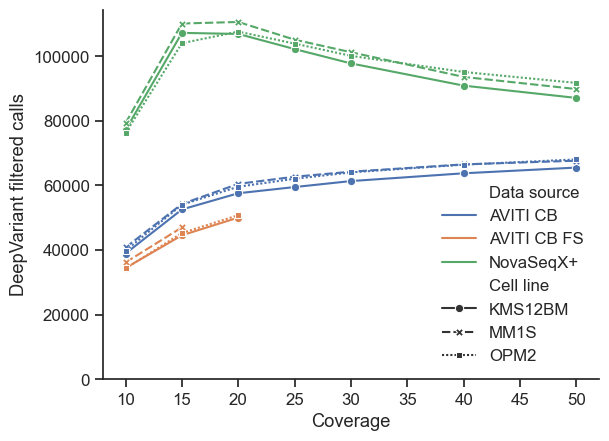

In [208]:
fig, ax = plt.subplots()
ax = sns.lineplot(data, x="cov", y="RefCall", hue="Data source", style="Cell line", markers=True)
ax.set_xlabel("Coverage")
ax.set_ylabel("DeepVariant filtered calls")
ax.set_ylim(bottom=0)
# Remove background on legend
ax.grid(False, axis="x")
ax.legend(frameon=False)

plt.savefig(figdir / "variant_call_refcalls.svg", backend='svg', 
            transparent=True, dpi=300, bbox_inches='tight')


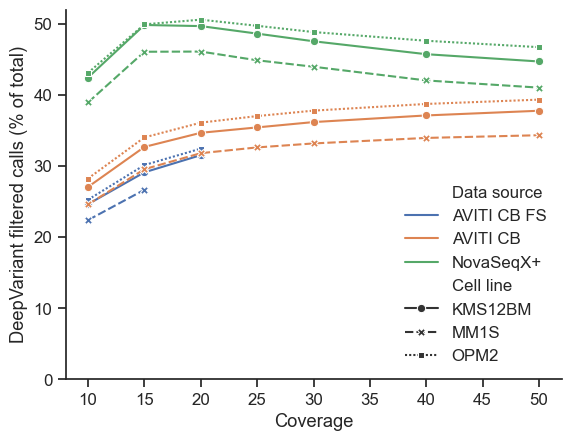

In [209]:
fig, ax = plt.subplots()
ax = sns.lineplot(data, x="cov", y="pctRefCall", hue="Data source", style="Cell line", markers=True,
                  hue_order=run_names.values())
ax.set_xlabel("Coverage")
ax.set_ylabel("DeepVariant filtered calls (% of total)")
ax.set_ylim(bottom=0)

# Remove background on legend
ax.grid(False, axis="x")
ax.legend(frameon=False)

plt.savefig(figdir / "variant_call_refcalls_pct.svg", backend='svg', 
            transparent=True, dpi=300, bbox_inches='tight')


## Summary data

In [31]:
# Load the summary data
sdata = []
for file in basedir.rglob("happy/*/*summary.csv"):
    df = pd.read_csv(file)
    run = file.parent.stem
    cell = file.stem.split("_")[0]
    cov = file.stem.split("_")[1]
    df["run"] = run
    df["Cell line"] = cell
    df["coverage"] = int(cov[:-1])
        
    sdata.append(df)

sdata = pd.concat(sdata).reset_index(drop=True)

# Only use PASS data
sdata = sdata[sdata["Filter"] == "PASS"]
sdata = sdata.drop("Filter", axis=1)
sdata["Data source"] = sdata["run"].replace(run_names)
sdata = sdata.sort_values(by="coverage")

sdata.head()

Type  TRUTH.TOTAL  TRUTH.TP  TRUTH.FN  QUERY.TOTAL  QUERY.FP  QUERY.UNK  \
99     SNP        78774     74674      4100       103666      1206      27788   
115    SNP        65932     62894      3038        86682       898      22889   
113  INDEL         7920      6900      1020        19576       264      12408   
137  INDEL         7625      6297      1328        17600       422      10871   
139    SNP        63304     59240      4064        83594      1401      22956   

     FP.gt  METRIC.Recall  METRIC.Precision  METRIC.Frac_NA  METRIC.F1_Score  \
99     790       0.947952          0.984106        0.268053         0.965691   
115    564       0.953922          0.985923        0.264057         0.969659   
113    182       0.871212          0.963170        0.633837         0.914886   
137    310       0.825836          0.937286        0.617670         0.878039   
139    798       0.935802          0.976896        0.274613         0.955907   

     TRUTH.TOTAL.TiTv_ratio  QUERY.TOTAL.TiTv_ratio  \
99                 2.330726                2.053560   
115                2.326322                2.055900   
113                     NaN                     NaN   
137                     NaN                     NaN   
139                2.316153                2.033193   

     TRUTH.TOTAL.het_hom_ratio  QUERY.TOTAL.het_hom_ratio        run  \
99                    2.239429                   2.053699  aviti_ngi   
115                   1.493777                   1.612488  aviti_ngi   
113                   1.647261                   1.661650  aviti_ngi   
137                   1.501689                   1.489708  xplus_sns   
139                   1.343317                   1.423637  xplus_sns   

    Cell line  coverage        Data source  
99       MM1S        10  AVITI CB FS (NGI)  
115   KMS12BM        10  AVITI CB FS (NGI)  
113   KMS12BM        10  AVITI CB FS (NGI)  
137      OPM2        10    NovaSeqX+ (S&S)  
139      OPM2        10    NovaSeqX+ (S&S)

### F1 Scores

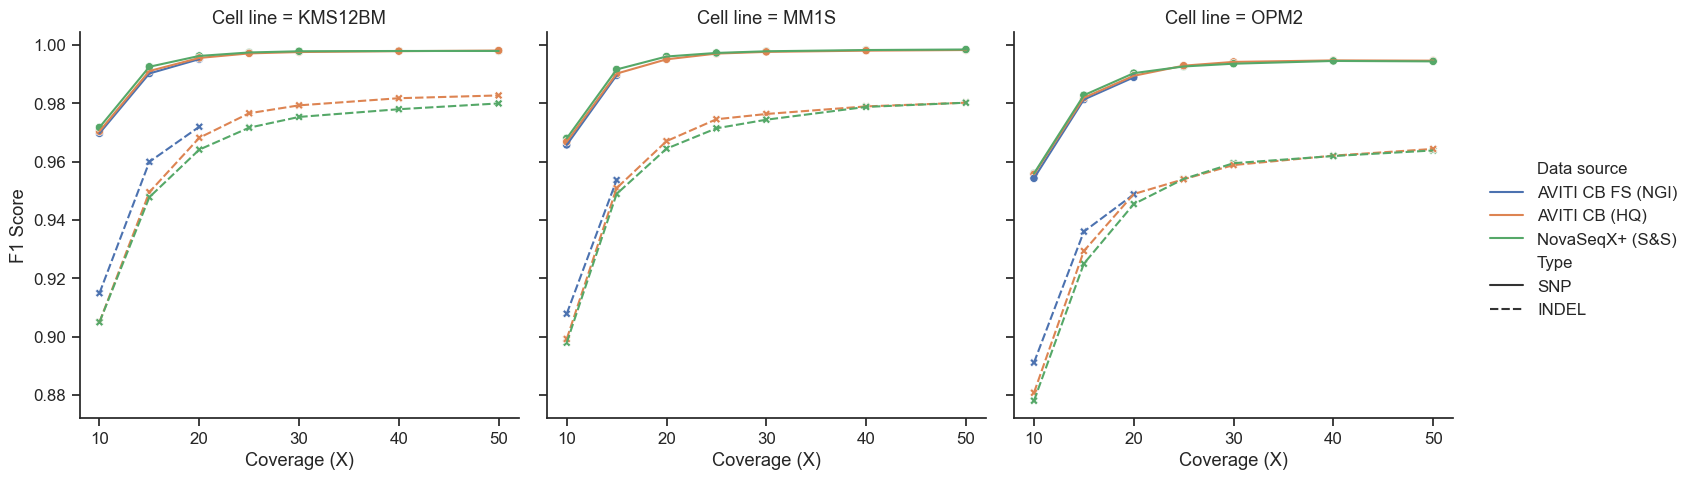

In [112]:
col_order=sorted(sdata["Cell line"].unique())
row_order=["SNP", "INDEL"]
g = sns.relplot(data=sdata, kind="line",
                hue="Data source", y="METRIC.F1_Score", x="coverage", col="Cell line", 
                style="Type", hue_order=run_names.values(), col_order=col_order, 
                style_order=row_order, facet_kws=dict(sharey="row"))
g.map_dataframe(sns.scatterplot, data=sdata, y="METRIC.F1_Score", x="coverage", 
                style="Type", style_order=row_order, hue="Data source", hue_order=run_names.values())

g.set(xlabel="Coverage (X)", ylabel="F1 Score")

g.savefig(figdir / "variant_vall_bench_f1_score.svg", backend='svg', 
            transparent=True, dpi=300, bbox_inches='tight')

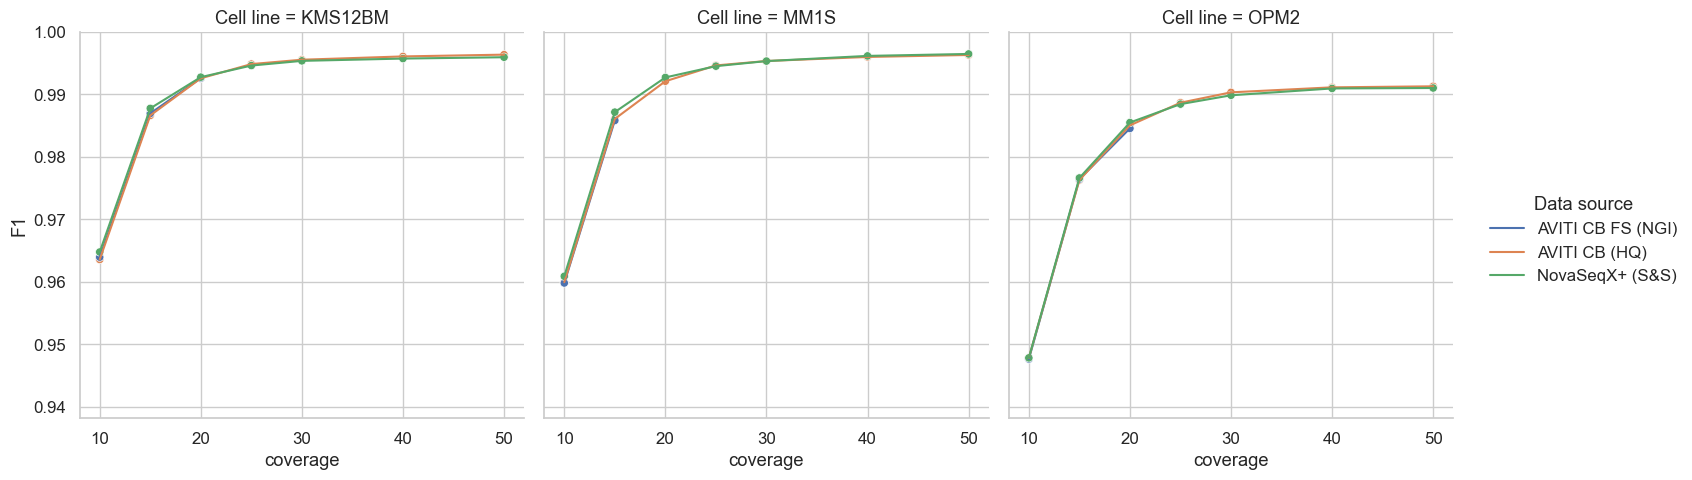

In [74]:
d = sdata.groupby(["coverage", "Cell line", "Data source"],as_index=False)\
    .agg({'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum"})
d["Recall"] = d["TRUTH.TP"] / (d["TRUTH.TP"] + d["TRUTH.FN"])
d["Precision"] = d["TRUTH.TP"] / (d["TRUTH.TP"] + d["QUERY.FP"])
d["F1"] = 2*d["TRUTH.TP"] / (2*d["TRUTH.TP"] + d["QUERY.FP"] + d["TRUTH.FN"])

col_order=sorted(sdata["Cell line"].unique())
g = sns.relplot(data=d, kind="line",
                hue="Data source", y="F1", x="coverage", col="Cell line", 
                hue_order=run_names.values(), col_order=col_order, 
                facet_kws=dict(sharey="row"))
g.map_dataframe(sns.scatterplot, data=sdata, y="F1", x="coverage", 
                hue="Data source", hue_order=run_names.values())
g.set(ylim=(d["F1"].min()*0.99,1))

### Precision Recall

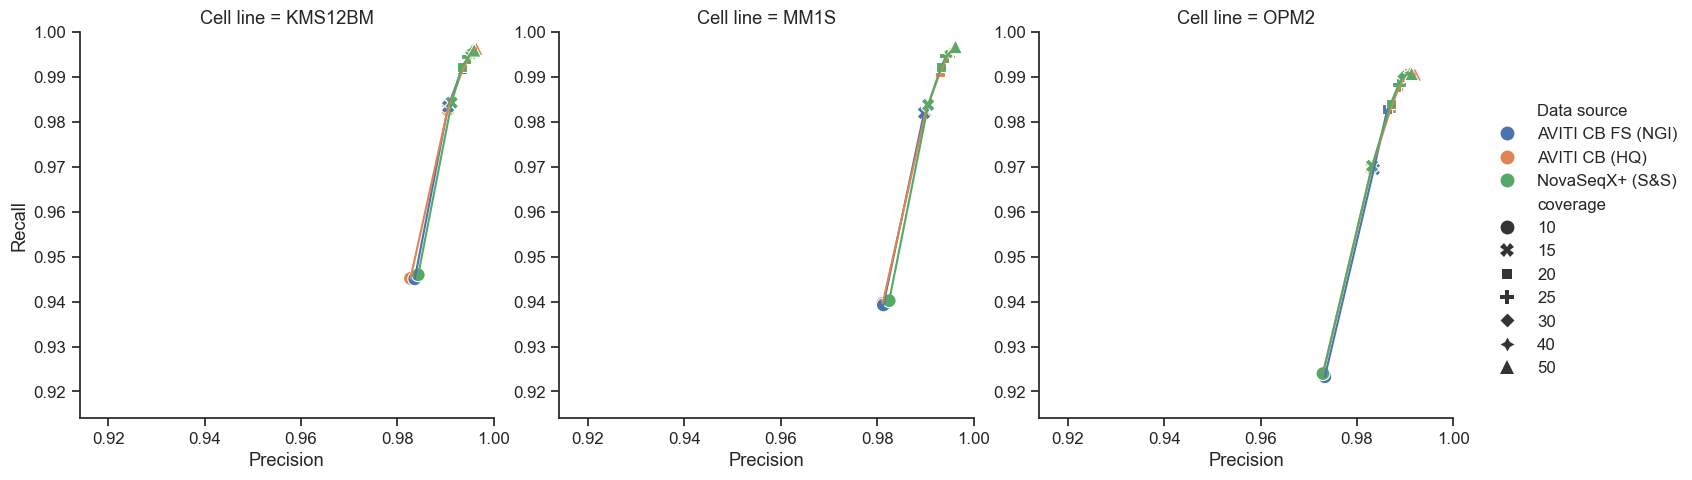

In [113]:
d = sdata.groupby(["coverage", "Cell line", "Data source"],as_index=False)\
    .agg({'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum"})
d["Recall"] = d["TRUTH.TP"] / (d["TRUTH.TP"] + d["TRUTH.FN"])
d["Precision"] = d["TRUTH.TP"] / (d["TRUTH.TP"] + d["QUERY.FP"])
d["F1"] = 2*d["TRUTH.TP"] / (2*d["TRUTH.TP"] + d["QUERY.FP"] + d["TRUTH.FN"])
g = sns.relplot(kind="scatter", data=d,
                hue="Data source", x="Precision", y="Recall", col="Cell line",  
                col_order=np.unique(sdata["Cell line"]), col_wrap=3, style="coverage",
                hue_order=run_names.values(), s=100, 
                facet_kws={"sharey": False, "sharex": False})
g.map_dataframe(sns.lineplot,data=d, 
                hue="Data source", x="Precision", y="Recall",hue_order=run_names.values())
lim=(min([d["Precision"].min(),d["Recall"].min()])*0.99, 1)
g.set(ylim=lim, xlim=lim)
g.savefig(figdir / "variant_vall_bench_precision_recall.svg", backend='svg', 
            transparent=True, dpi=300, bbox_inches='tight')

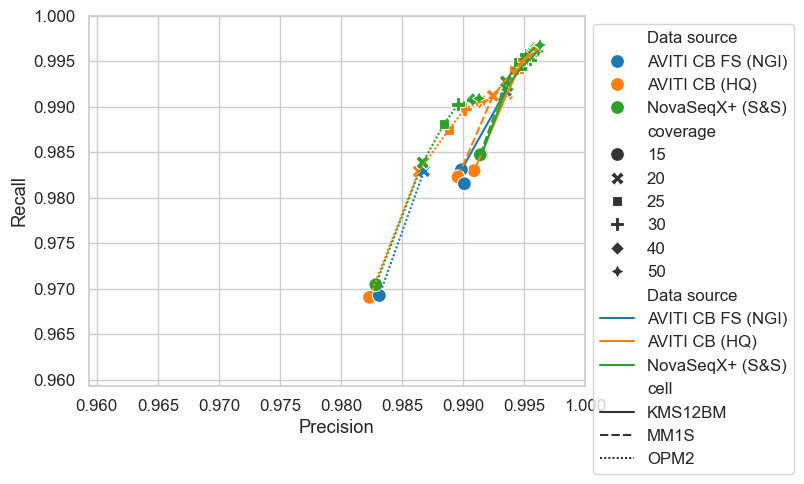

In [696]:
d = sdata.groupby(["coverage", "cell", "Data source"],as_index=False)\
    .agg({'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum"})
d["Recall"] = d["TRUTH.TP"] / (d["TRUTH.TP"] + d["TRUTH.FN"])
d["Precision"] = d["TRUTH.TP"] / (d["TRUTH.TP"] + d["QUERY.FP"])
d["F1"] = 2*d["TRUTH.TP"] / (2*d["TRUTH.TP"] + d["QUERY.FP"] + d["TRUTH.FN"])
g = sns.scatterplot(data=d,
                hue="Data source", x="Precision", y="Recall",
                style="coverage",
                hue_order=run_names.values(), s=100)
g = sns.lineplot(data=d, hue="Data source", x="Precision", y="Recall", style="cell", hue_order=run_names.values())
lim=(min([d["Precision"].min(),d["Recall"].min()])*0.99, 1)
g.set(ylim=lim, xlim=lim)
sns.move_legend(g, bbox_to_anchor=(1,1), loc="best")

In [697]:
print(d.to_csv(index=False))

coverage,cell,Data source,TRUTH.TP,TRUTH.FN,QUERY.FP,Recall,Precision,F1
15,KMS12BM,AVITI CB (HQ),72590,1257,665,0.9829783200400829,0.9909221213569039,0.9869342361082786
15,KMS12BM,AVITI CB FS (NGI),72597,1250,742,0.9830731106206074,0.9898825999809105,0.9864661041131629
15,KMS12BM,NovaSeqX+ (S&S),72720,1127,621,0.9847387165355397,0.9915327033991901,0.9881240318504226
15,MM1S,AVITI CB (HQ),86396,1558,908,0.9822861950565068,0.9895995601576102,0.9859293156375173
15,MM1S,AVITI CB FS (NGI),86330,1624,861,0.9815358028060123,0.9901251275934443,0.9858117559736218
15,MM1S,NovaSeqX+ (S&S),86610,1344,749,0.9847192850808377,0.9914261839077828,0.9880613531227005
15,OPM2,AVITI CB (HQ),68734,2196,1235,0.9690398984914704,0.9823493261301434,0.975649223912164
15,OPM2,AVITI CB FS (NGI),68749,2181,1178,0.9692513745946708,0.983153860454474,0.9761531198307504
15,OPM2,NovaSeqX+ (S&S),68833,2097,1200,0.9704356407725927,0.9828652206816786,0.976610883707072
20,KMS12BM,AVITI CB (HQ),73215,632,471,0.9914417647297

### FPs / FNs

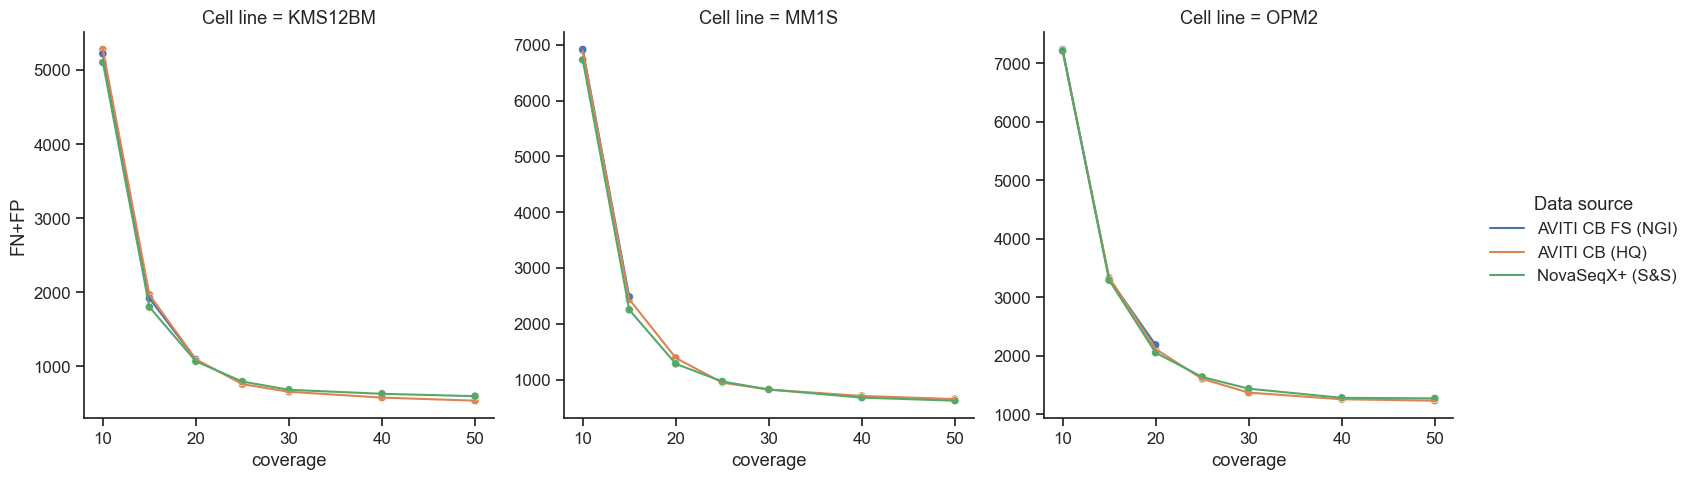

In [37]:
d = sdata.groupby(["coverage", "Cell line", "Data source"],as_index=False)\
    .agg({'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum"})

d["FN+FP"] = d["TRUTH.FN"] + d["QUERY.FP"]
col_order = sorted(sdata["Cell line"].unique())
g = sns.relplot(kind="line", data=d, 
                hue="Data source", x="coverage", y="FN+FP", col="Cell line",  
                col_order=col_order, facet_kws=dict(sharey=False),
                hue_order=run_names.values())

g.map_dataframe(sns.scatterplot, data=d, 
                hue="Data source", x="coverage", y="FN+FP",
                hue_order=run_names.values())



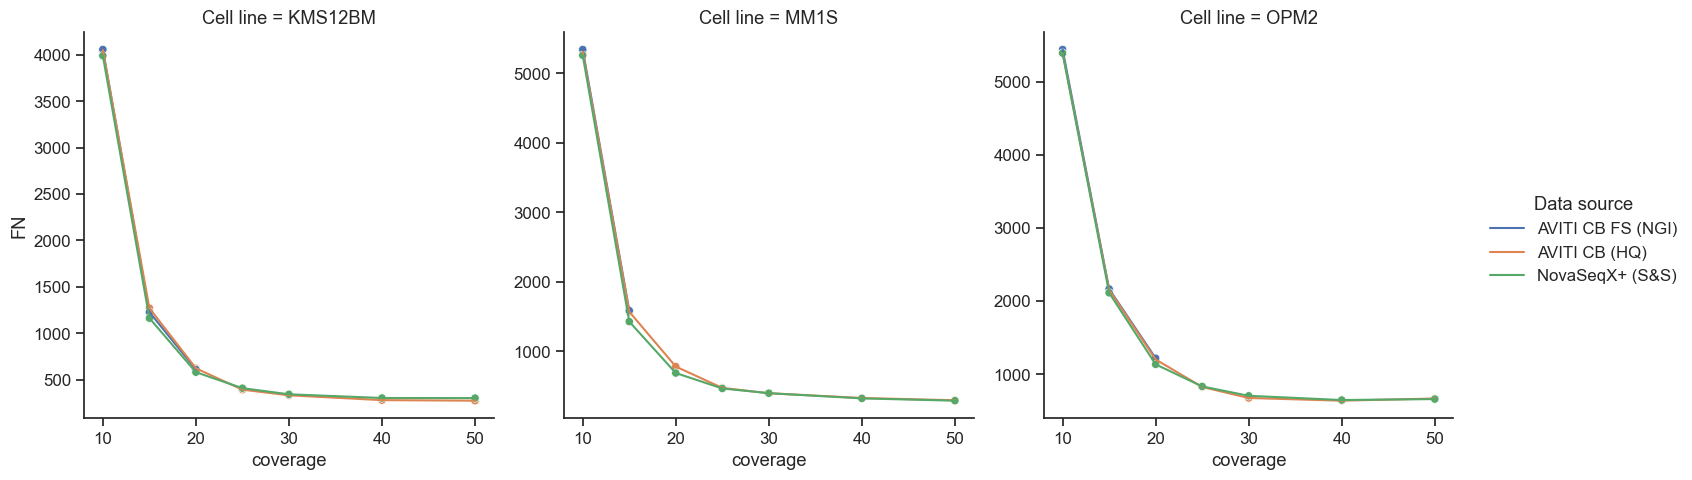

In [38]:
d = sdata.groupby(["coverage", "Cell line", "Data source"],as_index=False)\
    .agg({'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum"})

d["FN"] = d["TRUTH.FN"]
col_order = sorted(sdata["Cell line"].unique())
g = sns.relplot(kind="line", data=d, 
                hue="Data source", x="coverage", y="FN", col="Cell line",  
                col_order=col_order, facet_kws=dict(sharey=False),
                hue_order=run_names.values())

g.map_dataframe(sns.scatterplot, data=d, 
                hue="Data source", x="coverage", y="FN",
                hue_order=run_names.values())

#g.set(ylim=(0.75, 0.9))

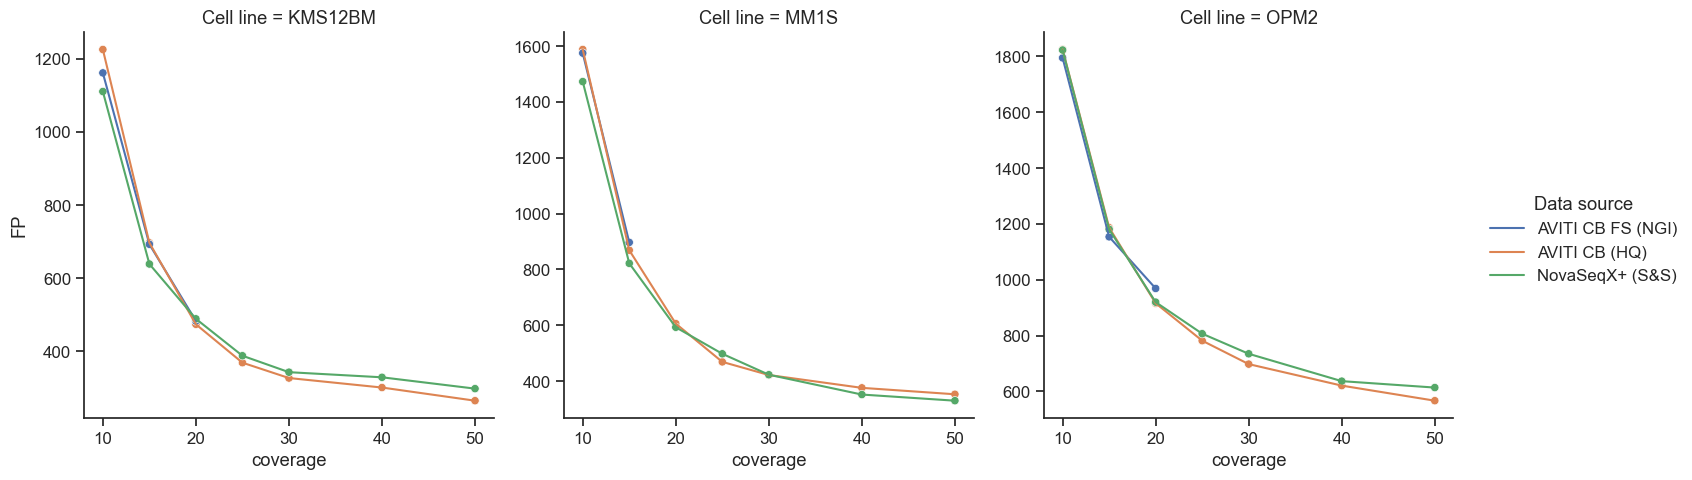

In [39]:
d = sdata.groupby(["coverage", "Cell line", "Data source"],as_index=False)\
    .agg({'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum"})

d["FP"] = d["QUERY.FP"]
col_order = sorted(sdata["Cell line"].unique())
g = sns.relplot(kind="line", data=d, 
                hue="Data source", x="coverage", y="FP", col="Cell line",  
                col_order=col_order, facet_kws=dict(sharey=False),
                hue_order=run_names.values())

g.map_dataframe(sns.scatterplot, data=d, 
                hue="Data source", x="coverage", y="FP",
                hue_order=run_names.values())

#g.set(ylim=(0.75, 0.9))

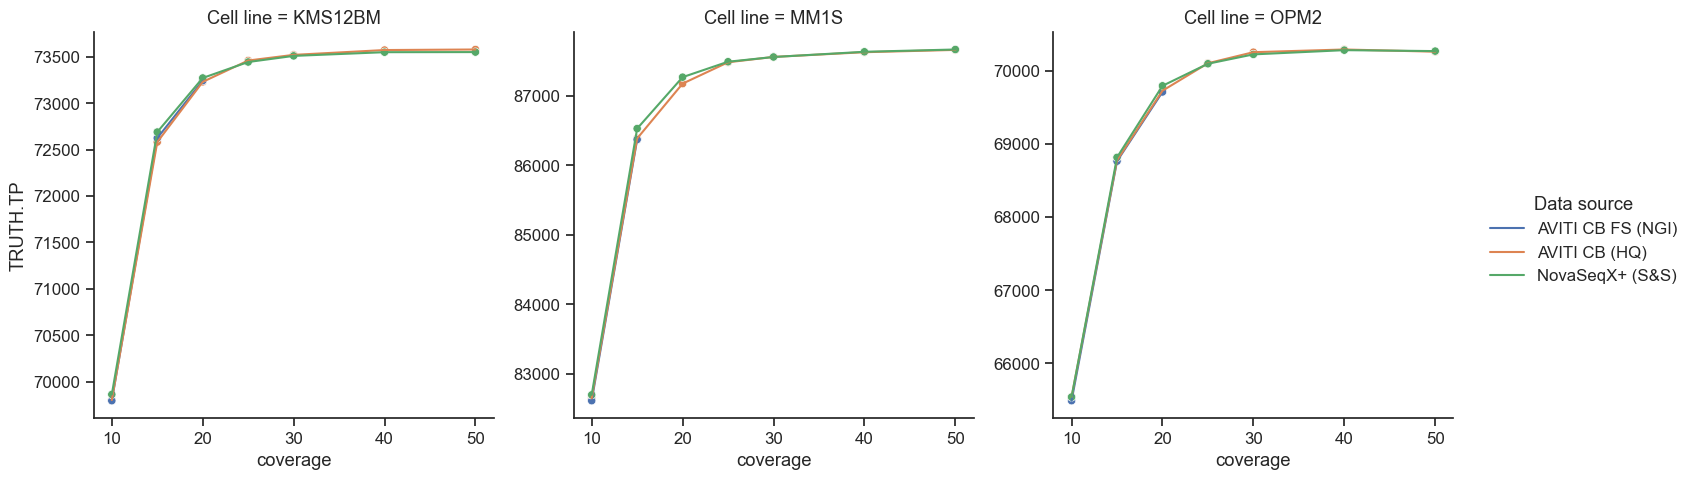

In [40]:
d = sdata.groupby(["coverage", "Cell line", "Data source"],as_index=False)\
    .agg({'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum"})

d["TP"] = d["TRUTH.TP"]
col_order = sorted(sdata["Cell line"].unique())
g = sns.relplot(kind="line", data=d, 
                hue="Data source", x="coverage", y="TP", col="Cell line",  
                col_order=col_order, facet_kws=dict(sharey=False),
                hue_order=run_names.values())

g.map_dataframe(sns.scatterplot, data=d, 
                hue="Data source", x="coverage", y="TRUTH.TP",
                hue_order=run_names.values())

#g.set(ylim=(0.75, 0.9))

## Extended data

In [162]:
edata["Subset.Size"]

1       6.427417e+07
3       2.756350e+09
5       8.397744e+07
7       1.683700e+08
9       4.017636e+07
            ...     
4215    1.106712e+07
4217    3.421649e+07
4219    7.565341e+07
4221    1.668603e+08
4223    1.518409e+08
Name: Subset.Size, Length: 9300, dtype: float64

In [2]:
# Load the extended data
edata = []
for file in basedir.rglob("happy/*/*extended.csv"):
    df = pd.read_csv(file)
    run = file.parent.stem
    cell = file.stem.split("_")[0]
    cov = file.stem.split("_")[1]
    df["run"] = run
    df["Cell line"] = cell
    df["coverage"] = int(cov[:-1])
    edata.append(df)

edata = pd.concat(edata)

edata = edata[
    (edata["Filter"] == "PASS") &\
    (edata["Subtype"] == "*") &\
    ~(edata["Subset"].str.startswith("HG")) &\
    ~(edata["Subset"].str.startswith("gnomAD")) &\
    ~(edata["Subset"].str.startswith("ancestry")) &\
    ~(edata["Subset"].str.startswith("TS_"))
]
edata = edata.drop(["Filter", "Subtype"], axis=1)
edata["Data source"] = edata["run"].replace(run_names)

# Remove "SimpleRepeat" prefix to shorten stratification names
edata.loc[edata["Subset"].str.startswith("SimpleRepeat"),"Subset"] = edata[edata["Subset"].str.startswith("SimpleRepeat")]["Subset"].apply(lambda x: "_".join(x.split("_")[1:]))
edata.head()

Type                                       Subset Genotype QQ.Field QQ  \
1  INDEL                                            *        *       DP  *   
3  INDEL                                 AllAutosomes        *       DP  *   
5  INDEL  AllHomopolymers_ge7bp_imperfectge11bp_slop5        *       DP  *   
7  INDEL                             AllTandemRepeats        *       DP  *   
9  INDEL          AllTandemRepeats_201to10000bp_slop5        *       DP  *   

   METRIC.Recall  METRIC.Precision  METRIC.Frac_NA  METRIC.F1_Score  FP.gt  \
1       0.965377          0.963244        0.644633         0.964309     99   
3       0.965377          0.963244        0.644633         0.964309     99   
5       0.977011          0.975410        0.894682         0.976210      8   
7       0.926090          0.921462        0.466305         0.923770     87   
9       0.838509          0.903333        0.759615         0.869715      9   

   ...  QUERY.UNK.ti  QUERY.UNK.tv  QUERY.UNK.het  QUERY.UNK.homalt  \
1  ...             .             .         9038.0            4295.0   
3  ...             .             .         9038.0            4295.0   
5  ...             .             .         6780.0            3116.0   
7  ...             .             .         1755.0             764.0   
9  ...             .             .          596.0             339.0   

   QUERY.UNK.TiTv_ratio QUERY.UNK.het_hom_ratio       run  Cell line  \
1                   NaN                2.104307  aviti_hq       OPM2   
3                   NaN                2.104307  aviti_hq       OPM2   
5                   NaN                2.175866  aviti_hq       OPM2   
7                   NaN                2.297120  aviti_hq       OPM2   
9                   NaN                1.758112  aviti_hq       OPM2   

   coverage    Data source  
1        50  AVITI CB (HQ)  
3        50  AVITI CB (HQ)  
5        50  AVITI CB (HQ)  
7        50  AVITI CB (HQ)  
9        50  AVITI CB (HQ)  

[5 rows x 67 columns]

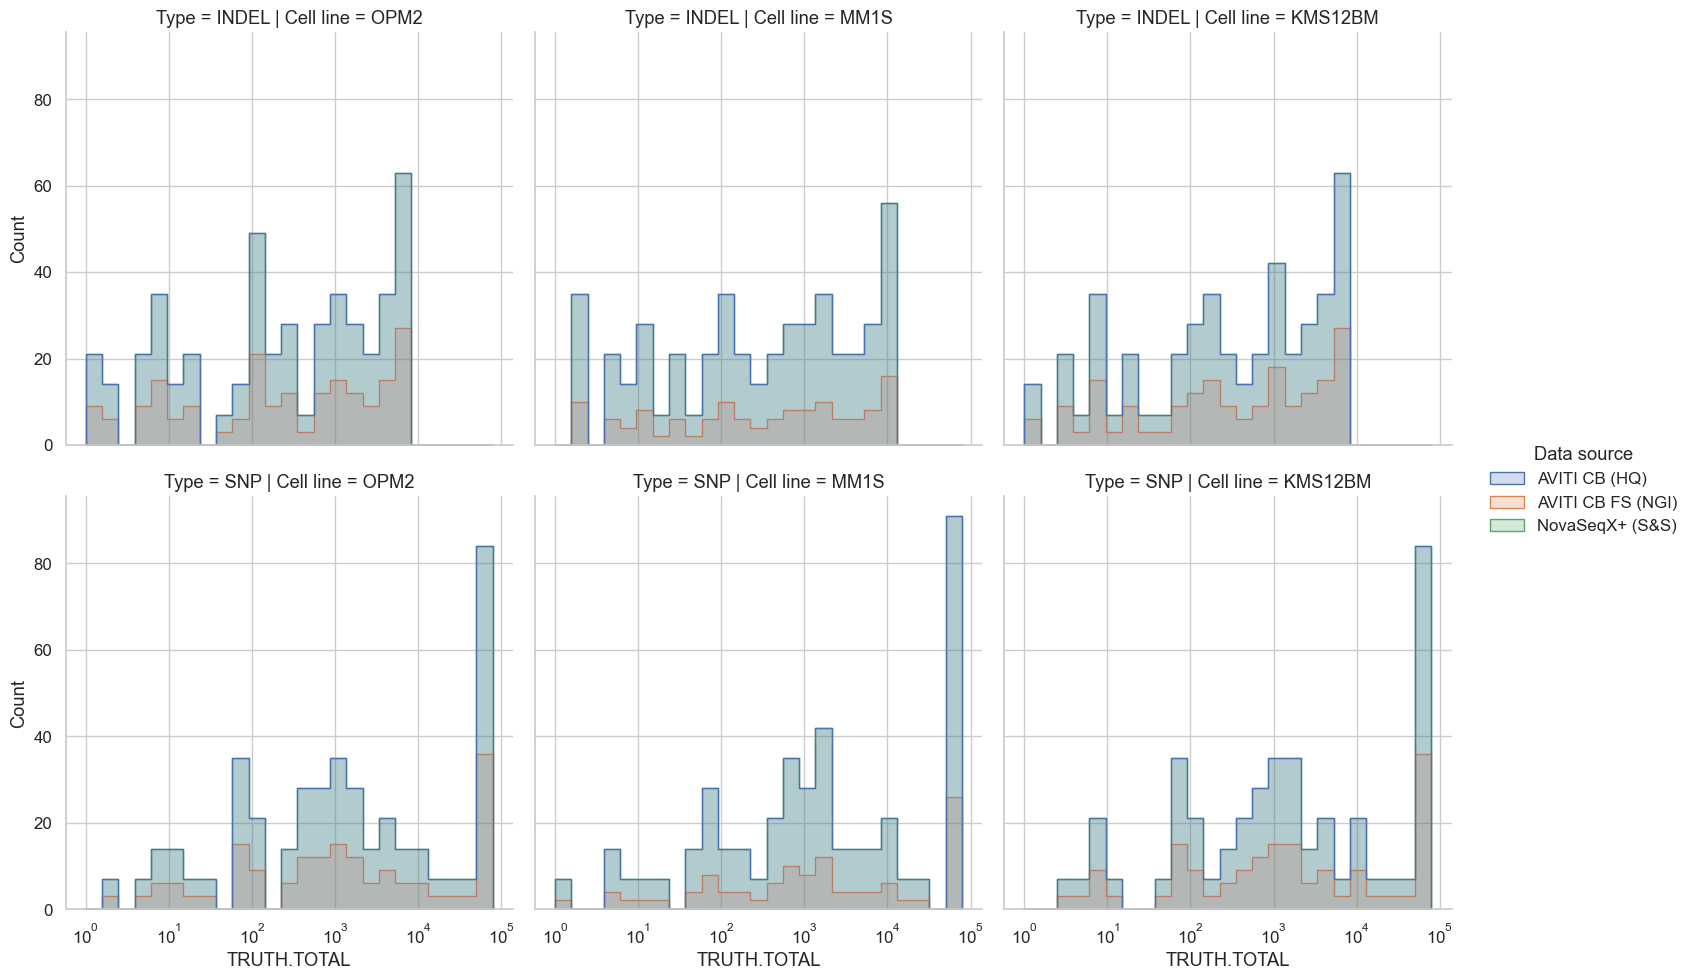

In [52]:
g = sns.displot(edata, kind="hist", x="TRUTH.TOTAL", hue="Data source", col="Cell line", row="Type", log_scale=True, element="step")


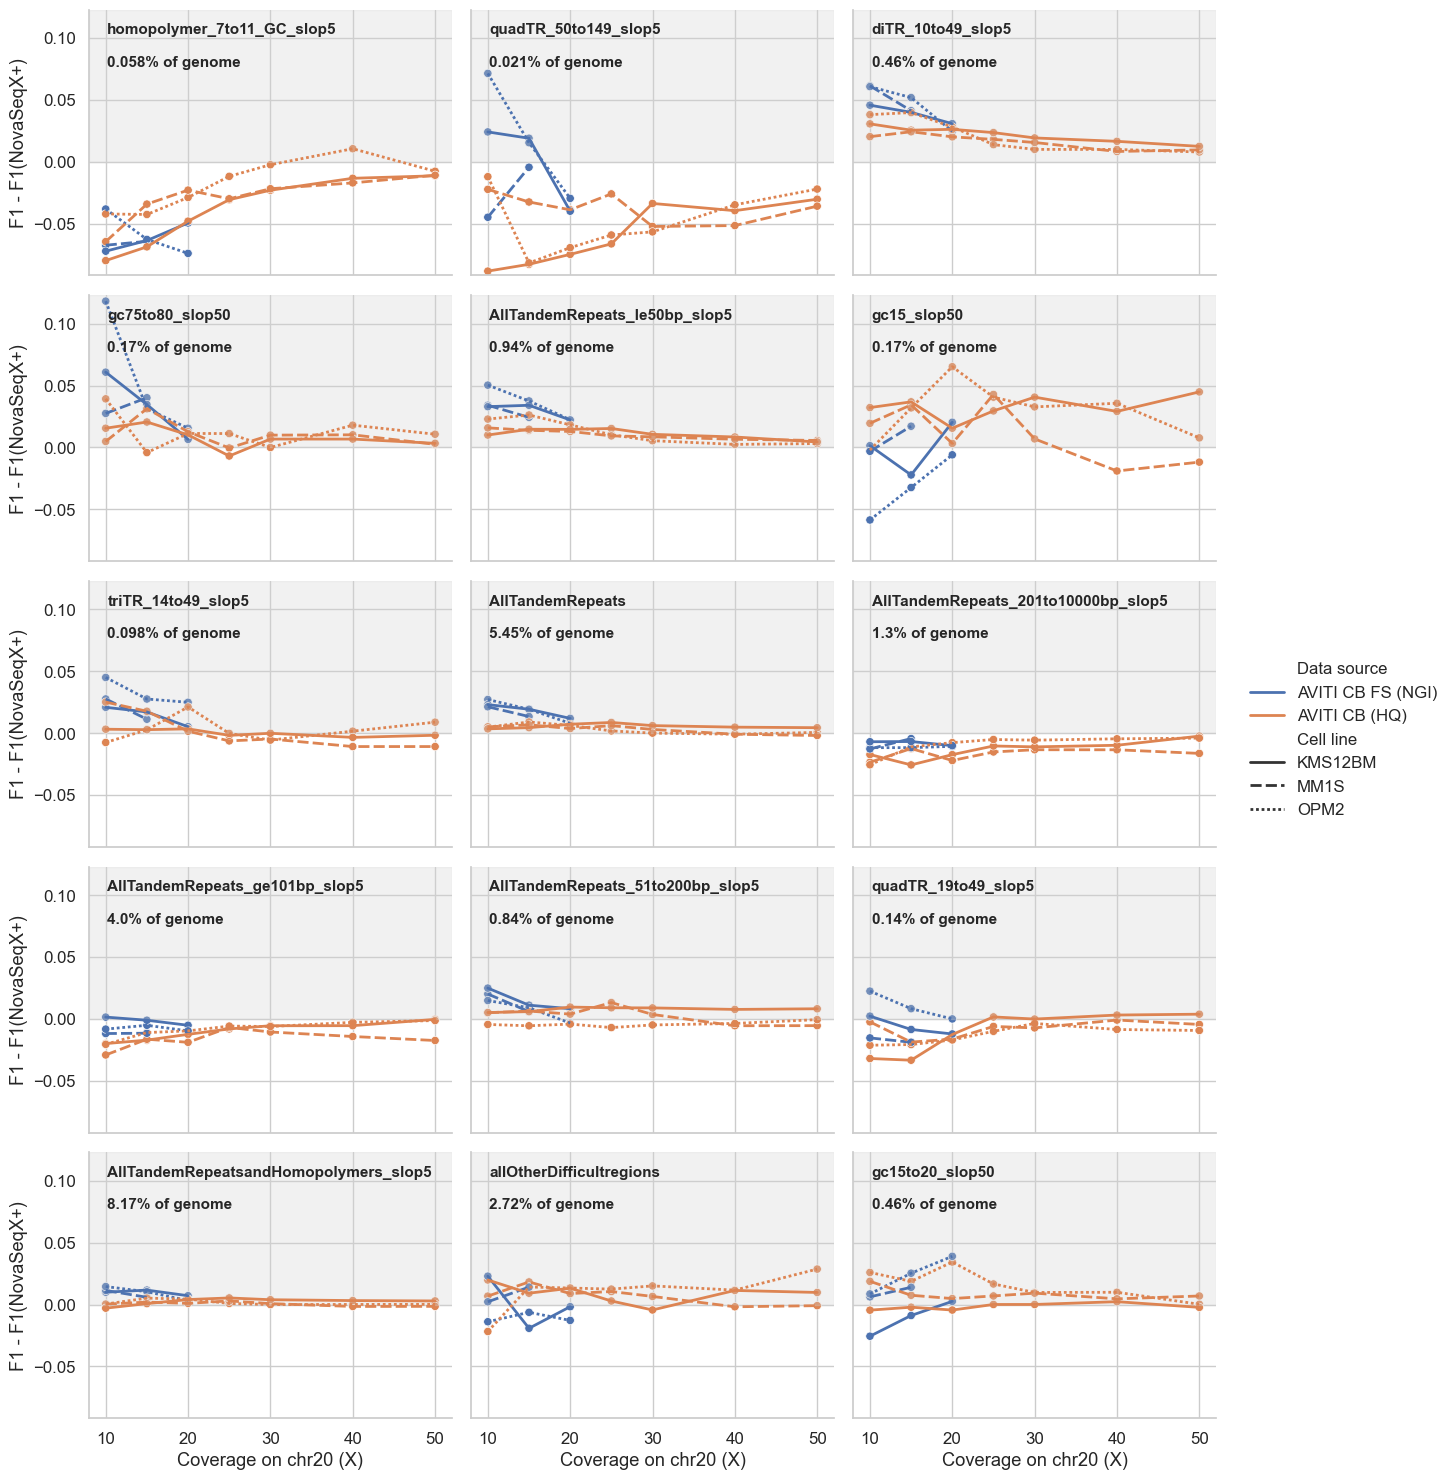

In [172]:
sns.set_style("whitegrid")
d = edata.copy()
#d = d.query("Type == 'INDEL'")
d = d.groupby(["Subset", "Cell line", "Data source", "coverage"],as_index=False)\
    .agg({'TRUTH.TOTAL':"sum",'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum", "QUERY.TP": "sum", "Subset.Size": "first"})

d = d[d["TRUTH.TOTAL"] > 0]

d["F1"] = (d["TRUTH.TP"] + d["QUERY.TP"]) / (d["TRUTH.TP"] + d["QUERY.TP"] + d["QUERY.FP"] + d["TRUTH.FN"])

# Automsomal + XY size
# command: head -24 resources/GRCh38_GIABv3/GRCh38_GIABv3_no_alt_analysis_set_maskedGRC_decoys_MAP2K3_KMT2C_KCNJ18.fasta.gz.fai | cut -f 2 | awk '{sum += $1} END {print sum}'"
genome_size = 3088269832
d["Subset_sizenorm"] = 100 * d["Subset.Size"] / genome_size

#Filter out subsets with few TRUTH Variant
subs_filt = d[d["TRUTH.TOTAL"] <= 100]["Subset"].unique()
d = d[~d["Subset"].isin(subs_filt)]

metric = "F1"

d = d.sort_values(by="Data source", ascending=False)
d[metric + "_gain"] = d.groupby(["Subset", "Cell line", "coverage"])[metric].transform(
    lambda x: (x-x.iloc[0])
)
d = d[d["Data source"] != "NovaSeqX+ (S&S)"]

#d["tmp"] = d.groupby(["Subset"])["F1_gain"].transform(lambda x: x.abs().sum())
#d["tmp"] = d.groupby(["Subset"])["F1_gain"].transform(lambda x: abs(x.sum()))
d["tmp"] = d.groupby(["Subset", "Data source"])["F1_gain"].transform(lambda x: abs(x.sum())/len(x))
d = d.sort_values(by="tmp", ascending=False)

strats = d["Subset"].unique().tolist()[:15]
d = d[d["Subset"].isin(strats)]

hue_order=['AVITI CB FS (NGI)', 'AVITI CB (HQ)']
style_order = sorted(d["Cell line"].unique())
g = sns.relplot(d, kind="line", x="coverage", y="F1_gain", hue="Data source", 
                style="Cell line", hue_order=hue_order, col="Subset", 
                col_wrap=3, height=3, aspect=1.4, lw=2, style_order=style_order,
                facet_kws=dict(sharey=True))

g.map_dataframe(sns.scatterplot, data=d, x="coverage", y="F1_gain", 
                hue="Data source", hue_order=hue_order)

ylim = (d["F1_gain"].min()*1.04,d["F1_gain"].max()*1.04)

g.set(
    ylim=ylim, 
    ylabel="F1 - F1(NovaSeqX+)", 
    xlabel="Coverage on chr20 (X)"
)

for s, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    size = d[d["Subset"] == s]["Subset_sizenorm"].iloc[0]
    decimals = -np.log10(size).astype(int) + 2
    title = f"{s}\n\n{round(size, decimals)}% of genome"
    ax.text(.05, 0.95, title, transform=ax.transAxes, fontweight="bold", size=11, va="top")
    ax.axhspan(ymin=0, ymax=ylim[1], color="lightgray", alpha=0.3)


g.set_titles("")
g.tight_layout()
g.savefig(figdir / "variant_vall_bench_f1_diff_stratification.svg", backend='svg', 
            transparent=True, dpi=300, bbox_inches='tight')

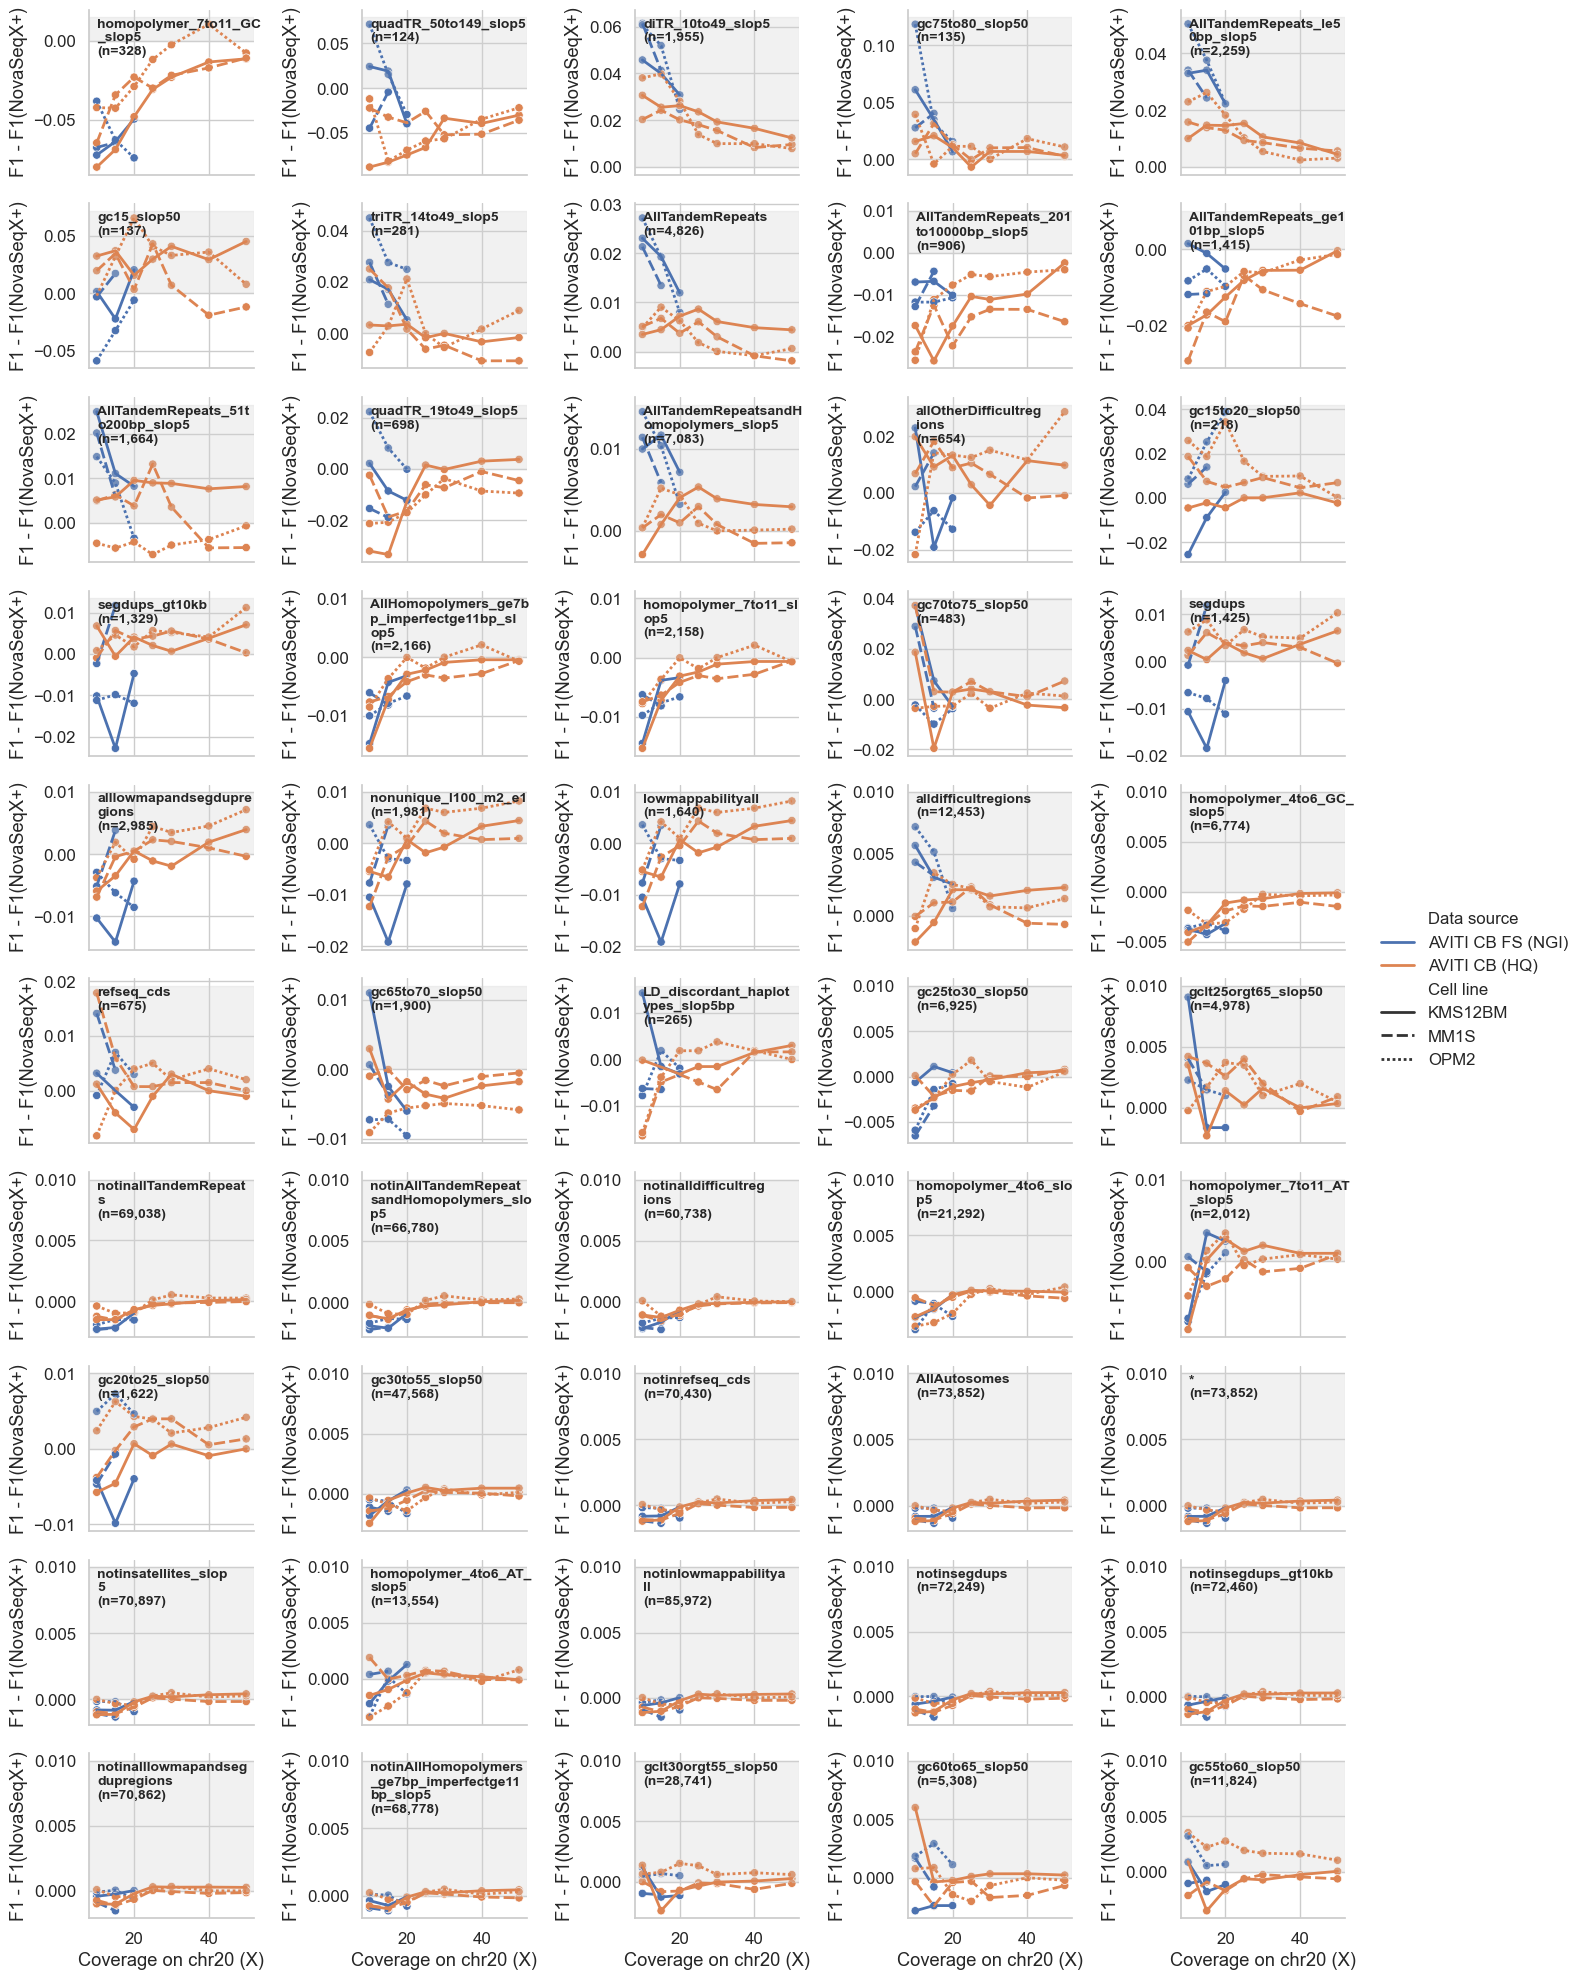

In [167]:
sns.set_style("whitegrid")
d = edata.copy()
d = d.groupby(["Subset", "Cell line", "Data source", "coverage"],as_index=False)\
. agg({'TRUTH.TOTAL':"sum",'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum", "QUERY.TP": "sum"})

d = d[d["TRUTH.TOTAL"] > 0]

d["F1"] = (d["TRUTH.TP"] + d["QUERY.TP"]) / (d["TRUTH.TP"] + d["QUERY.TP"] + d["QUERY.FP"] + d["TRUTH.FN"])

#Filter out subsets with few TRUTH Variant
subs_filt = d[d["TRUTH.TOTAL"] <= 100]["Subset"].unique()
d = d[~d["Subset"].isin(subs_filt)]

metric = "F1"

d = d.sort_values(by="Data source", ascending=False)
d[metric + "_gain"] = d.groupby(["Subset", "Cell line", "coverage"])[metric].transform(
    lambda x: (x-x.iloc[0])
)
d = d[d["Data source"] != "NovaSeqX+ (S&S)"]

#d["tmp"] = d.groupby(["Subset"])["F1_gain"].transform(lambda x: x.abs().sum())
#d["tmp"] = d.groupby(["Subset"])["F1_gain"].transform(lambda x: abs(x.sum()))
d["tmp"] = d.groupby(["Subset", "Data source"])["F1_gain"].transform(lambda x: abs(x.sum())/len(x))
d = d.sort_values(by="tmp", ascending=False)

#strats = d["Subset"].unique().tolist()[:15]
#d = d[d["Subset"].isin(strats)]

hue_order=['AVITI CB FS (NGI)', 'AVITI CB (HQ)']
style_order = sorted(d["Cell line"].unique())
g = sns.relplot(d, kind="line", x="coverage", y="F1_gain", hue="Data source", 
                style="Cell line", hue_order=hue_order, col="Subset", 
                col_wrap=5, height=2, aspect=1.4, lw=2, style_order=style_order,
                facet_kws=dict(sharey=False))

g.map_dataframe(sns.scatterplot, data=d, x="coverage", y="F1_gain", 
                hue="Data source", hue_order=hue_order)

ylim = (d["F1_gain"].min()*1.04,d["F1_gain"].max()*1.04)

g.set(
    #ylim=ylim, 
    ylabel="F1 - F1(NovaSeqX+)", 
    xlabel="Coverage on chr20 (X)"
)

import textwrap
g.fig.subplots_adjust(wspace=0.1, hspace=0.1)
for s, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    truth = d[d["Subset"] == s]["TRUTH.TOTAL"].iloc[0]
    name = textwrap.fill(s, width=20)
    title = f"{name}\n(n={truth:,})"
    ylim = ax.get_ylim()
    ax.text(.05, 0.95, title, transform=ax.transAxes, fontweight="bold", size=10, va="top")
    ax.axhspan(ymin=0, ymax=max(ylim[1],0.01), color="lightgray", alpha=0.3)


g.set_titles("")
g.tight_layout()
#g.savefig(figdir / "variant_vall_bench_f1_diff_stratification.svg", backend='svg', 
#            transparent=True, dpi=300, bbox_inches='tight')

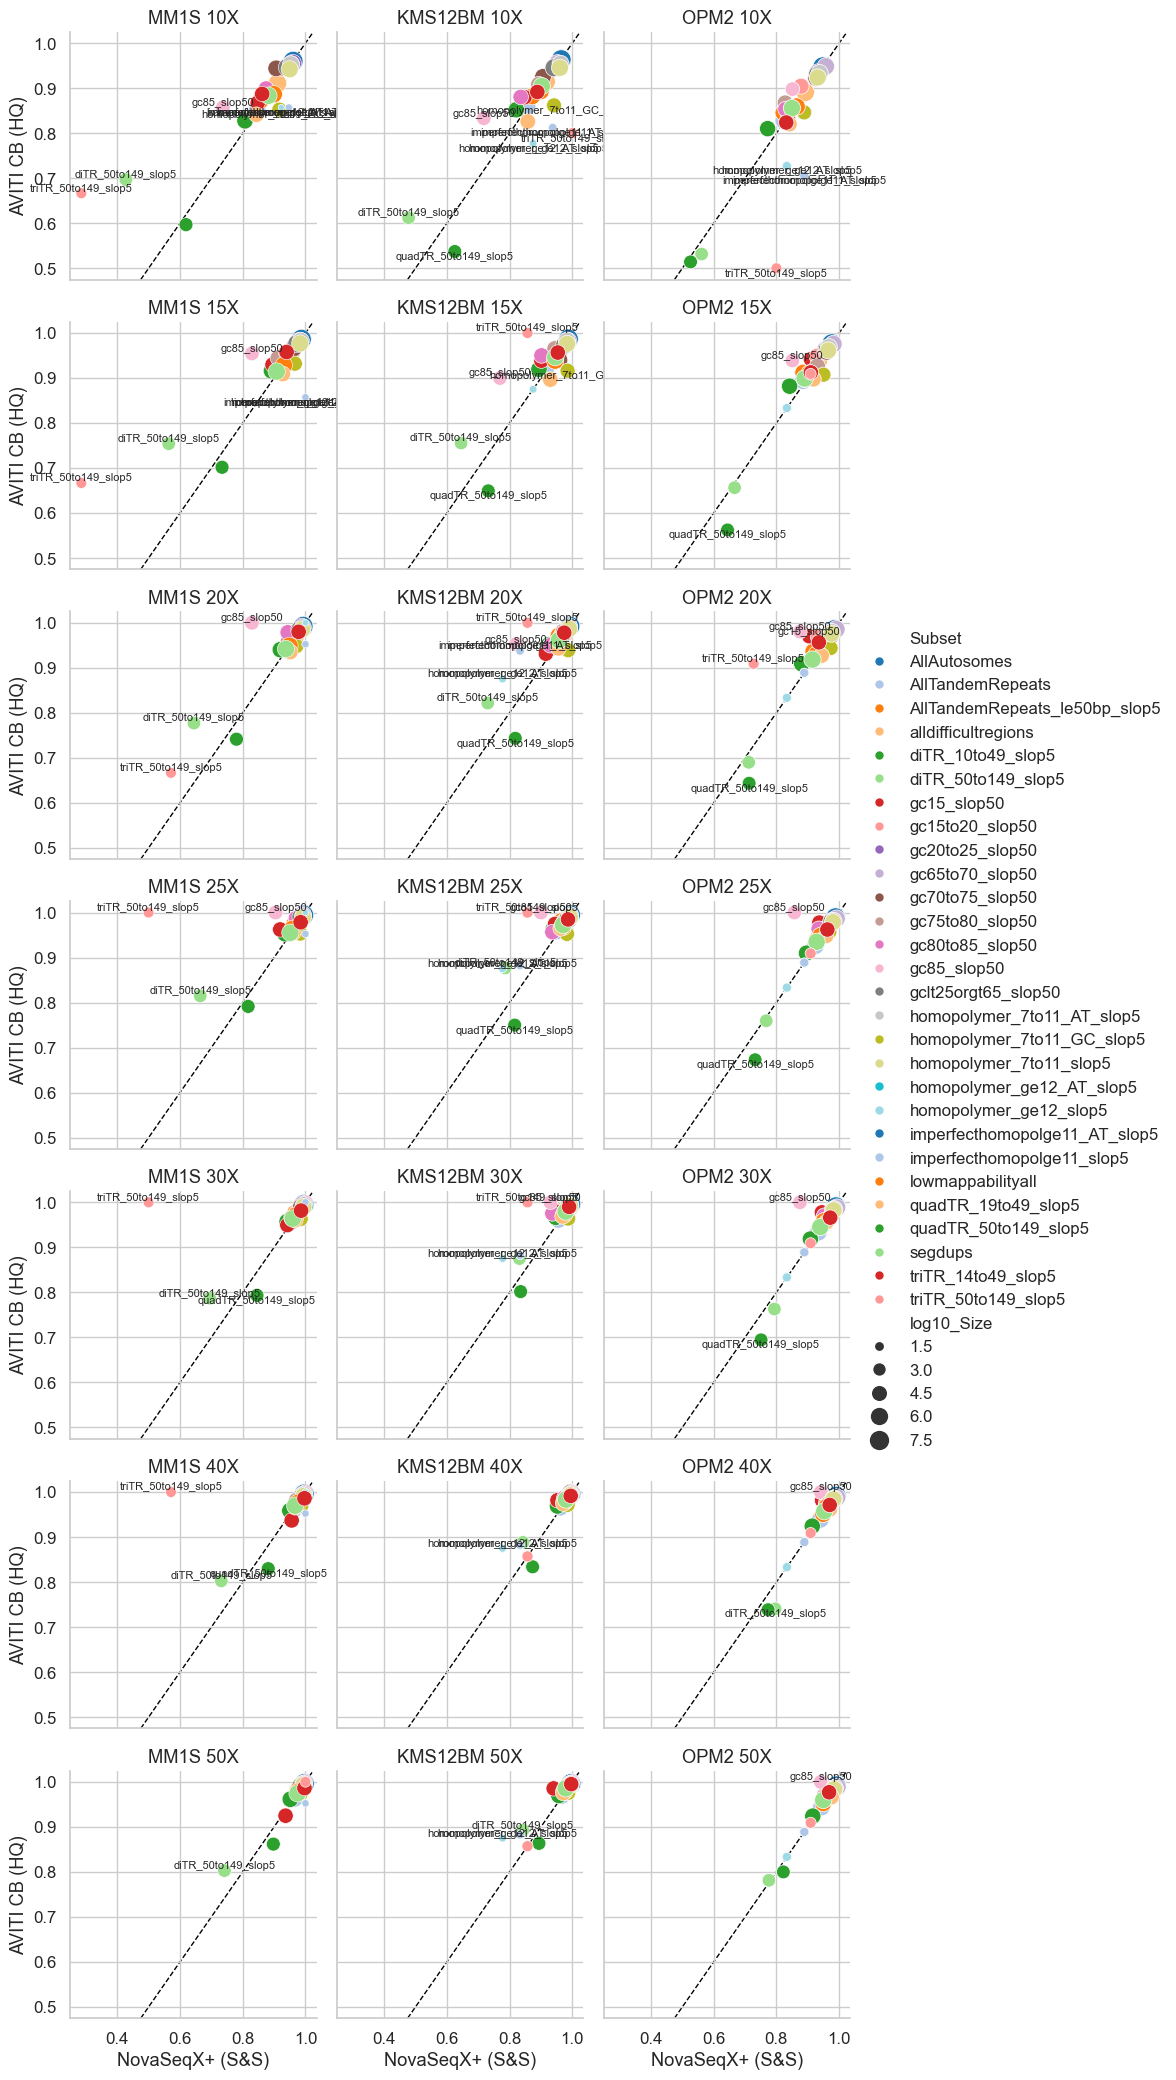

In [150]:
subsets = [
    # '*',
    'AllAutosomes',
    # 'AllHomopolymers_ge7bp_imperfectge11bp_slop5',
    'AllTandemRepeats',
    # 'AllTandemRepeats_201to10000bp_slop5',
    # 'AllTandemRepeats_51to200bp_slop5',
    # 'AllTandemRepeats_ge10001bp_slop5',
    # 'AllTandemRepeats_ge101bp_slop5',
    'AllTandemRepeats_le50bp_slop5',
    # 'AllTandemRepeatsandHomopolymers_slop5',
    # 'BadPromoters',
    # 'CMRGv1.00_duplicationinKMT2C',
    # 'CMRGv1.00_falselyduplicatedgenes',
    # 'KIR',
    # 'L1H_gt500',
    # 'LD_discordant_haplotypes_slop5bp',
    # 'MHC',
    'diTR_10to49_slop5',
    'diTR_50to149_slop5',
    'diTR_ge150_slop5',
    # 'homopolymer_4to6_AT_slop5',
    # 'homopolymer_4to6_GC_slop5',
    # 'homopolymer_4to6_slop5',
    'homopolymer_7to11_AT_slop5',
    'homopolymer_7to11_GC_slop5',
    'homopolymer_7to11_slop5',
    'homopolymer_ge12_AT_slop5',
    'homopolymer_ge12_GC_slop5',
    'homopolymer_ge12_slop5',
    # 'homopolymer_ge21_AT_slop5',
    # 'homopolymer_ge21_GC_slop5',
    # 'homopolymer_ge21_slop5',
    'imperfecthomopolge11_AT_slop5',
    'imperfecthomopolge11_GC_slop5',
    'imperfecthomopolge11_slop5',
    # 'imperfecthomopolge21_AT_slop5',
    # 'imperfecthomopolge21_GC_slop5',
    # 'imperfecthomopolge21_slop5',
    'quadTR_19to49_slop5',
    'quadTR_50to149_slop5',
    'quadTR_ge150_slop5',
    'triTR_14to49_slop5',
    'triTR_50to149_slop5',
    'triTR_ge150_slop5',
    # 'VDJ',
    # 'allOtherDifficultregions',
    'alldifficultregions',
    # 'alllowmapandsegdupregions',
    # 'chrX_PAR',
    # 'chrX_XTR',
    # 'chrX_ampliconic',
    # 'chrX_nonPAR',
    # 'chrY_PAR',
    # 'chrY_XTR',
    # 'chrY_ampliconic',
    # 'chrY_nonPAR',
    # 'collapsed_duplication_FP_regions',
    # 'contigs_lt500kb',
    # 'false_duplications_correct_copy',
    # 'false_duplications_incorrect_copy',
    # 'gaps_slop15kb',
    'gc15_slop50',
    'gc15to20_slop50',
    'gc20to25_slop50',
    # 'gc25to30_slop50',
    # 'gc30to55_slop50',
    # 'gc55to60_slop50',
    # 'gc60to65_slop50',
    'gc65to70_slop50',
    'gc70to75_slop50',
    'gc75to80_slop50',
    'gc80to85_slop50',
    'gc85_slop50',
    'gclt25orgt65_slop50',
    # 'gclt30orgt55_slop50',
    'lowmappabilityall',
    # 'nonunique_l100_m2_e1',
    # 'nonunique_l250_m0_e0',
    # 'notinAllHomopolymers_ge7bp_imperfectge11bp_slop5',
    # 'notinAllTandemRepeatsandHomopolymers_slop5',
    # 'notinallTandemRepeats',
    # 'notinalldifficultregions',
    # 'notinalllowmapandsegdupregions',
    # 'notinlowmappabilityall',
    # 'notinrefseq_cds',
    # 'notinsatellites_slop5',
    # 'notinsegdups',
    # 'notinsegdups_gt10kb',
    # 'population_CNV_FP_regions',
    # 'refseq_cds',
    # 'satellites_slop5',
    'segdups',
    # 'segdups_gt10kb'
    ]

d = edata[edata["Subset"].isin(subsets)].copy()

group_subsets = {
    "HP (GC)": [
        "homopolymer_7to11_GC_slop5",
        "homopolymer_ge12_GC_slop5",
        "imperfecthomopolge11_GC_slop5",
    ],
    "HP (AT)": [
        "homopolymer_7to11_AT_slop5",
        "homopolymer_ge12_AT_slop5",
        "imperfecthomopolge11_AT_slop5",
    ],
    "HP (all)": [
        "homopolymer_7to11_slop5",
        "homopolymer_ge12_slop5",
        "imperfecthomopolge11_slop5",
    ],
    "TR (di)": [
        "diTR_10to49_slop5",
        "diTR_50to149_slop5",
        "diTR_ge150_slop5",
    ],
    "TR (tri)": [
        "triTR_14to49_slop5",
        "triTR_50to149_slop5",
        "triTR_ge150_slop5",
    ],
    "TR (quad)": [
        "quadTR_19to49_slop5",
        "quadTR_50to149_slop5",
        "quadTR_ge150_slop5",
    ],
    "GC low": [
        "gc15_slop50",
        "gc15to20_slop50",
        "gc20to25_slop50",
    ],
    "GC high": [
        "gc65to70_slop50",
        "gc70to75_slop50",
        "gc75to80_slop50",
        "gc80to85_slop50",
        "gc85_slop50",
    ],
    "GC low-high": [
        "gclt25orgt65_slop50",
    ],
    "Difficult": [
        "alldifficultregions",
    ],
    "TR": [
        "AllTandemRepeats",
    ],
    "TR short": [
        "AllTandemRepeats_le50bp_slop5",
    ],
    "All": [
        "AllAutosomes",
    ],
    "Lowmap": [
        "lowmappabilityall",
    ],
    "SegDup": [
        "segdups",
    ],


}
subsets_to_group = {v: k for k, vs in group_subsets.items() for v in vs}
#d["Subset"] = d["Subset"].replace(subsets_to_group)

#d["Platfrom"] = d["Data source"].str.split(" ").str[0]
d = d.groupby(["Subset", "Cell line", "Data source", "coverage"],as_index=False)\
    .agg({'TRUTH.TOTAL':"sum",'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum", "QUERY.TP": "sum", "Subset.IS_CONF.Size": "first"})

d = d[d["TRUTH.TOTAL"] > 0]

d["F1"] = (d["TRUTH.TP"] + d["QUERY.TP"]) / (d["TRUTH.TP"] + d["QUERY.TP"] + d["QUERY.FP"] + d["TRUTH.FN"])
d["log10_TRUTH.TOTAL"] = np.log10(d["TRUTH.TOTAL"])
d["log10_Size"] = np.log10(d["Subset.IS_CONF.Size"])
d = d.pivot(index=["Subset", "log10_Size", "Cell line", "coverage"], columns="Data source", values="F1").reset_index()

g = sns.relplot(data=d, kind="scatter", x="NovaSeqX+ (S&S)", y="AVITI CB (HQ)", hue="Subset", col="Cell line", 
                row="coverage", size="log10_Size", sizes=(20, 200), palette="tab20", height=3,
)
g.set_titles("{col_name} {row_name}X")
#g.set(xlim=(0.7, 1), ylim=(0.7, 1))
for (cov, cell), ax in g.axes_dict.items():
    ax.axline((1, 1), slope=1, color="black", ls="--", lw=1, zorder=-1)
    dax = d[(d["coverage"] == cov) & (d["Cell line"] == cell)]
    for i, row in dax.iterrows():
        x = row["NovaSeqX+ (S&S)"]
        y = row["AVITI CB (HQ)"]
        if x-y > 0.05:
            ax.text(row["NovaSeqX+ (S&S)"], row["AVITI CB (HQ)"], row["Subset"], ha="center", va="top", fontsize=8)
        elif y-x > 0.05:
            ax.text(row["NovaSeqX+ (S&S)"], row["AVITI CB (HQ)"], row["Subset"], ha="center", va="bottom", fontsize=8)



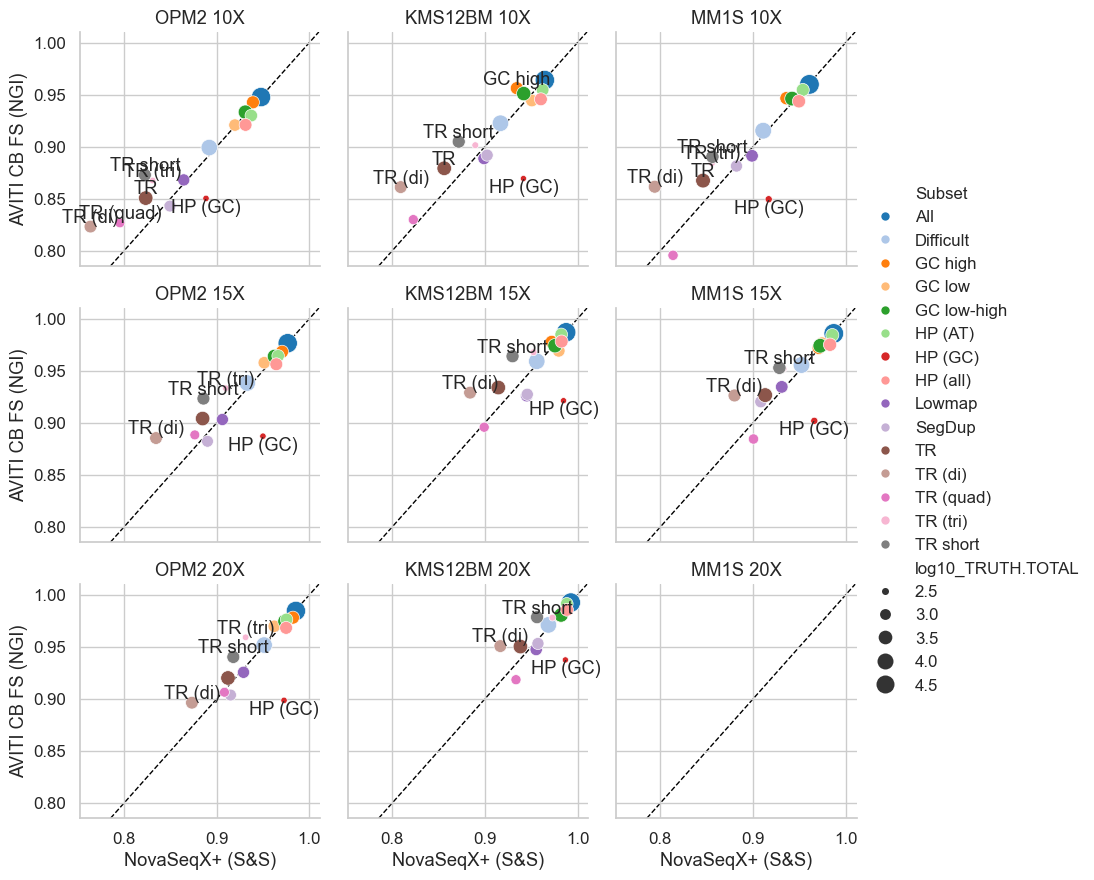

In [98]:
subsets = [
    # '*',
    'AllAutosomes',
    # 'AllHomopolymers_ge7bp_imperfectge11bp_slop5',
    'AllTandemRepeats',
    # 'AllTandemRepeats_201to10000bp_slop5',
    # 'AllTandemRepeats_51to200bp_slop5',
    # 'AllTandemRepeats_ge10001bp_slop5',
    # 'AllTandemRepeats_ge101bp_slop5',
    'AllTandemRepeats_le50bp_slop5',
    # 'AllTandemRepeatsandHomopolymers_slop5',
    # 'BadPromoters',
    # 'CMRGv1.00_duplicationinKMT2C',
    # 'CMRGv1.00_falselyduplicatedgenes',
    # 'KIR',
    # 'L1H_gt500',
    # 'LD_discordant_haplotypes_slop5bp',
    # 'MHC',
    'diTR_10to49_slop5',
    'diTR_50to149_slop5',
    'diTR_ge150_slop5',
    # 'homopolymer_4to6_AT_slop5',
    # 'homopolymer_4to6_GC_slop5',
    # 'homopolymer_4to6_slop5',
    'homopolymer_7to11_AT_slop5',
    'homopolymer_7to11_GC_slop5',
    'homopolymer_7to11_slop5',
    'homopolymer_ge12_AT_slop5',
    'homopolymer_ge12_GC_slop5',
    'homopolymer_ge12_slop5',
    # 'homopolymer_ge21_AT_slop5',
    # 'homopolymer_ge21_GC_slop5',
    # 'homopolymer_ge21_slop5',
    'imperfecthomopolge11_AT_slop5',
    'imperfecthomopolge11_GC_slop5',
    'imperfecthomopolge11_slop5',
    # 'imperfecthomopolge21_AT_slop5',
    # 'imperfecthomopolge21_GC_slop5',
    # 'imperfecthomopolge21_slop5',
    'quadTR_19to49_slop5',
    'quadTR_50to149_slop5',
    'quadTR_ge150_slop5',
    'triTR_14to49_slop5',
    'triTR_50to149_slop5',
    'triTR_ge150_slop5',
    # 'VDJ',
    # 'allOtherDifficultregions',
    'alldifficultregions',
    # 'alllowmapandsegdupregions',
    # 'chrX_PAR',
    # 'chrX_XTR',
    # 'chrX_ampliconic',
    # 'chrX_nonPAR',
    # 'chrY_PAR',
    # 'chrY_XTR',
    # 'chrY_ampliconic',
    # 'chrY_nonPAR',
    # 'collapsed_duplication_FP_regions',
    # 'contigs_lt500kb',
    # 'false_duplications_correct_copy',
    # 'false_duplications_incorrect_copy',
    # 'gaps_slop15kb',
    'gc15_slop50',
    'gc15to20_slop50',
    'gc20to25_slop50',
    # 'gc25to30_slop50',
    # 'gc30to55_slop50',
    # 'gc55to60_slop50',
    # 'gc60to65_slop50',
    'gc65to70_slop50',
    'gc70to75_slop50',
    'gc75to80_slop50',
    'gc80to85_slop50',
    'gc85_slop50',
    'gclt25orgt65_slop50',
    # 'gclt30orgt55_slop50',
    'lowmappabilityall',
    # 'nonunique_l100_m2_e1',
    # 'nonunique_l250_m0_e0',
    # 'notinAllHomopolymers_ge7bp_imperfectge11bp_slop5',
    # 'notinAllTandemRepeatsandHomopolymers_slop5',
    # 'notinallTandemRepeats',
    # 'notinalldifficultregions',
    # 'notinalllowmapandsegdupregions',
    # 'notinlowmappabilityall',
    # 'notinrefseq_cds',
    # 'notinsatellites_slop5',
    # 'notinsegdups',
    # 'notinsegdups_gt10kb',
    # 'population_CNV_FP_regions',
    # 'refseq_cds',
    # 'satellites_slop5',
    'segdups',
    # 'segdups_gt10kb'
    ]

d = edata[edata["Subset"].isin(subsets)].copy()

group_subsets = {
    "HP (GC)": [
        "homopolymer_7to11_GC_slop5",
        "homopolymer_ge12_GC_slop5",
        "imperfecthomopolge11_GC_slop5",
    ],
    "HP (AT)": [
        "homopolymer_7to11_AT_slop5",
        "homopolymer_ge12_AT_slop5",
        "imperfecthomopolge11_AT_slop5",
    ],
    "HP (all)": [
        "homopolymer_7to11_slop5",
        "homopolymer_ge12_slop5",
        "imperfecthomopolge11_slop5",
    ],
    "TR (di)": [
        "diTR_10to49_slop5",
        "diTR_50to149_slop5",
        "diTR_ge150_slop5",
    ],
    "TR (tri)": [
        "triTR_14to49_slop5",
        "triTR_50to149_slop5",
        "triTR_ge150_slop5",
    ],
    "TR (quad)": [
        "quadTR_19to49_slop5",
        "quadTR_50to149_slop5",
        "quadTR_ge150_slop5",
    ],
    "GC low": [
        "gc15_slop50",
        "gc15to20_slop50",
        "gc20to25_slop50",
    ],
    "GC high": [
        "gc65to70_slop50",
        "gc70to75_slop50",
        "gc75to80_slop50",
        "gc80to85_slop50",
        "gc85_slop50",
    ],
    "GC low-high": [
        "gclt25orgt65_slop50",
    ],
    "Difficult": [
        "alldifficultregions",
    ],
    "TR": [
        "AllTandemRepeats",
    ],
    "TR short": [
        "AllTandemRepeats_le50bp_slop5",
    ],
    "All": [
        "AllAutosomes",
    ],
    "Lowmap": [
        "lowmappabilityall",
    ],
    "SegDup": [
        "segdups",
    ],


}
subsets_to_group = {v: k for k, vs in group_subsets.items() for v in vs}
d["Subset"] = d["Subset"].replace(subsets_to_group)

#d["Platfrom"] = d["Data source"].str.split(" ").str[0]
d = d.groupby(["Subset", "Cell line", "Data source", "coverage"],as_index=False)\
    .agg({'TRUTH.TOTAL':"sum",'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum", "QUERY.TP": "sum"})

d = d[(d["TRUTH.TOTAL"] > 0) & (d["coverage"] <= 20)]

d["F1"] = (d["TRUTH.TP"] + d["QUERY.TP"]) / (d["TRUTH.TP"] + d["QUERY.TP"] + d["QUERY.FP"] + d["TRUTH.FN"])
d["log10_TRUTH.TOTAL"] = np.log10(d["TRUTH.TOTAL"])
d = d.pivot(index=["Subset", "log10_TRUTH.TOTAL", "Cell line", "coverage"], columns="Data source", values="F1").reset_index()


g = sns.relplot(data=d, kind="scatter", x="NovaSeqX+ (S&S)", y="AVITI CB FS (NGI)", hue="Subset", col="Cell line", 
                row="coverage", size="log10_TRUTH.TOTAL", sizes=(20, 200), palette="tab20", height=3,
)
g.set_titles("{col_name} {row_name}X")
#g.set(xlim=(0.7, 1), ylim=(0.7, 1))
for (cov, cell), ax in g.axes_dict.items():
    ax.axline((1, 1), slope=1, color="black", ls="--", lw=1, zorder=-1)
    dax = d[(d["coverage"] == cov) & (d["Cell line"] == cell)]
    for i, row in dax.iterrows():
        x = row["NovaSeqX+ (S&S)"]
        y = row["AVITI CB FS (NGI)"]
        if x == 0.0 or y == 0.0:
            continue

        if x-y > 0.02:
            ax.text(x, y, row["Subset"], ha="center", va="top")
        elif y-x > 0.02:
            ax.text(x, y, row["Subset"], ha="center", va="bottom")



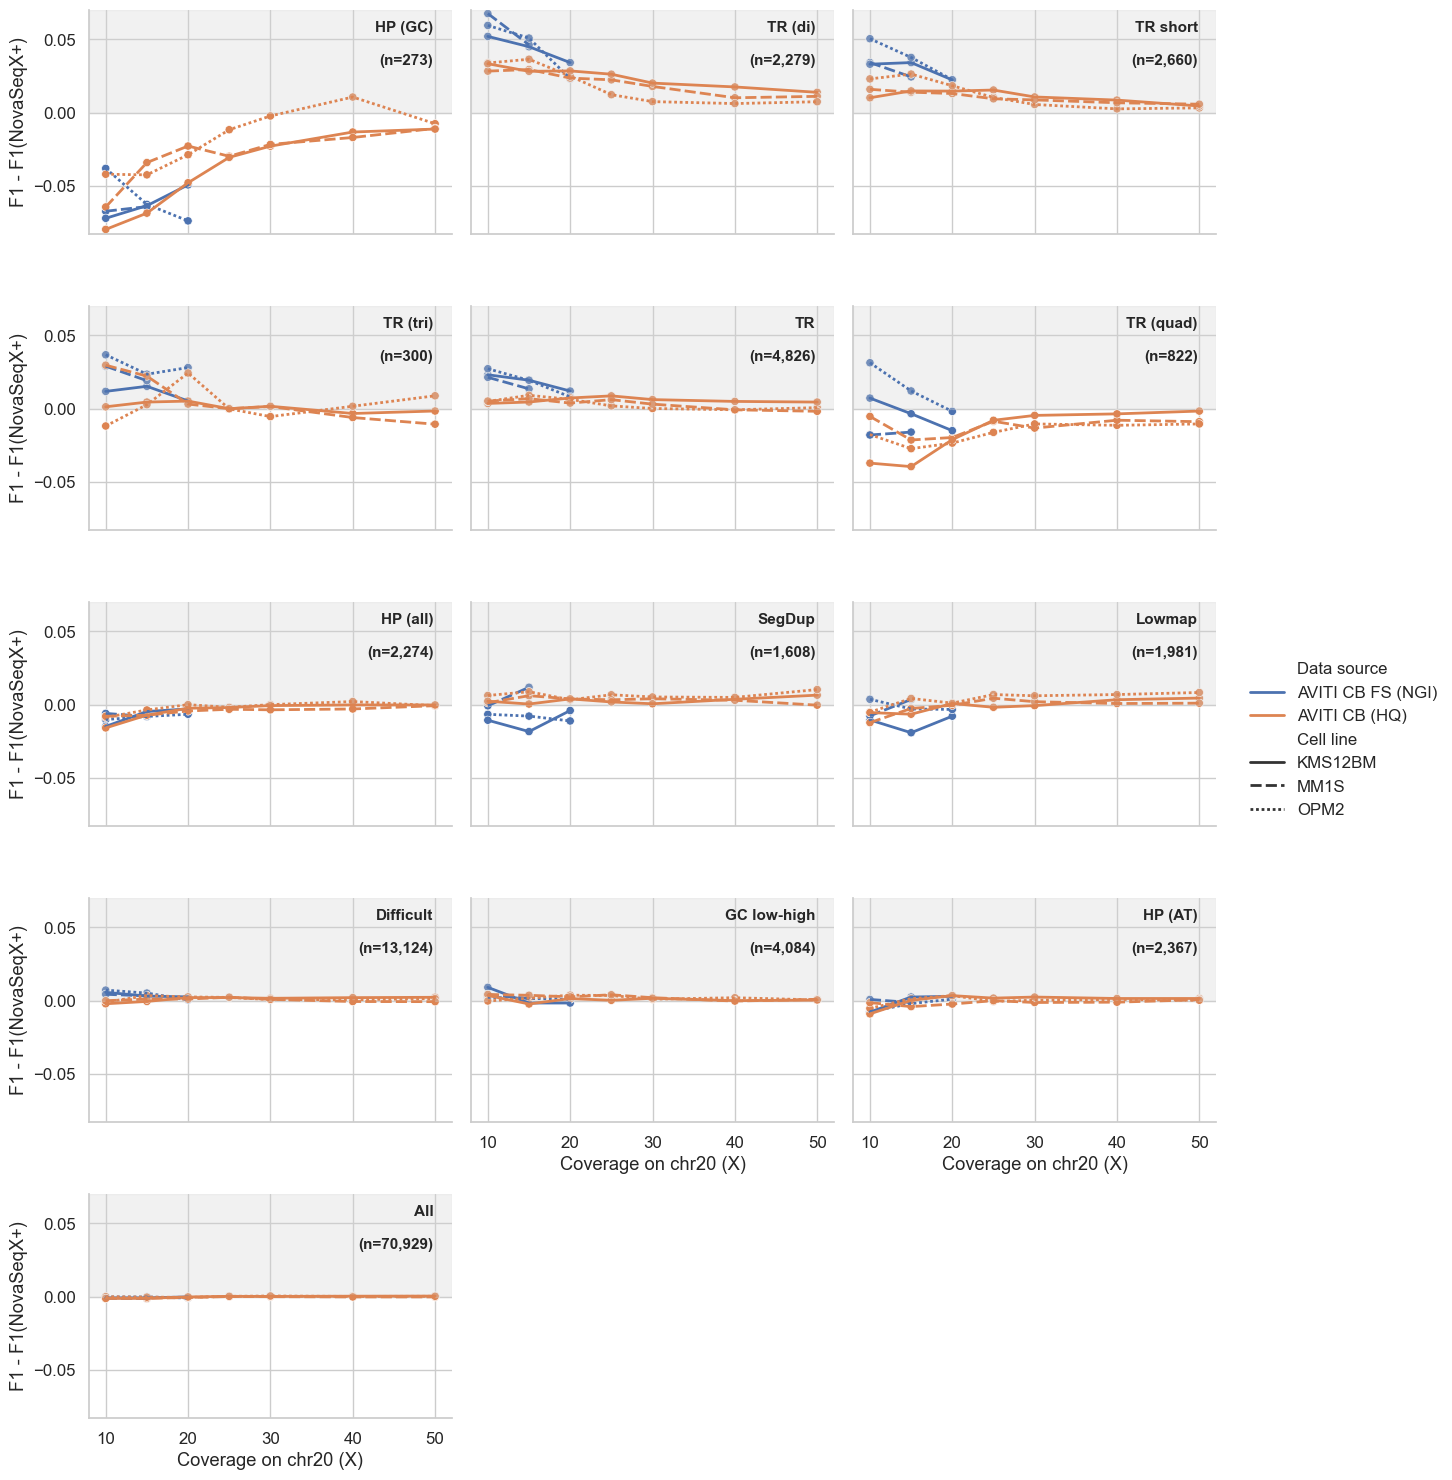

In [113]:
subsets = [
    # '*',
    'AllAutosomes',
    # 'AllHomopolymers_ge7bp_imperfectge11bp_slop5',
    'AllTandemRepeats',
    # 'AllTandemRepeats_201to10000bp_slop5',
    # 'AllTandemRepeats_51to200bp_slop5',
    # 'AllTandemRepeats_ge10001bp_slop5',
    # 'AllTandemRepeats_ge101bp_slop5',
    'AllTandemRepeats_le50bp_slop5',
    # 'AllTandemRepeatsandHomopolymers_slop5',
    # 'BadPromoters',
    # 'CMRGv1.00_duplicationinKMT2C',
    # 'CMRGv1.00_falselyduplicatedgenes',
    # 'KIR',
    # 'L1H_gt500',
    # 'LD_discordant_haplotypes_slop5bp',
    # 'MHC',
    'diTR_10to49_slop5',
    'diTR_50to149_slop5',
    'diTR_ge150_slop5',
    # 'homopolymer_4to6_AT_slop5',
    # 'homopolymer_4to6_GC_slop5',
    # 'homopolymer_4to6_slop5',
    'homopolymer_7to11_AT_slop5',
    'homopolymer_7to11_GC_slop5',
    'homopolymer_7to11_slop5',
    'homopolymer_ge12_AT_slop5',
    'homopolymer_ge12_GC_slop5',
    'homopolymer_ge12_slop5',
    # 'homopolymer_ge21_AT_slop5',
    # 'homopolymer_ge21_GC_slop5',
    # 'homopolymer_ge21_slop5',
    'imperfecthomopolge11_AT_slop5',
    'imperfecthomopolge11_GC_slop5',
    'imperfecthomopolge11_slop5',
    # 'imperfecthomopolge21_AT_slop5',
    # 'imperfecthomopolge21_GC_slop5',
    # 'imperfecthomopolge21_slop5',
    'quadTR_19to49_slop5',
    'quadTR_50to149_slop5',
    'quadTR_ge150_slop5',
    'triTR_14to49_slop5',
    'triTR_50to149_slop5',
    'triTR_ge150_slop5',
    # 'VDJ',
    # 'allOtherDifficultregions',
    'alldifficultregions',
    # 'alllowmapandsegdupregions',
    # 'chrX_PAR',
    # 'chrX_XTR',
    # 'chrX_ampliconic',
    # 'chrX_nonPAR',
    # 'chrY_PAR',
    # 'chrY_XTR',
    # 'chrY_ampliconic',
    # 'chrY_nonPAR',
    # 'collapsed_duplication_FP_regions',
    # 'contigs_lt500kb',
    # 'false_duplications_correct_copy',
    # 'false_duplications_incorrect_copy',
    # 'gaps_slop15kb',
    # 'gc15_slop50',
    # 'gc15to20_slop50',
    # 'gc20to25_slop50',
    # 'gc25to30_slop50',
    # 'gc30to55_slop50',
    # 'gc55to60_slop50',
    # 'gc60to65_slop50',
    # 'gc65to70_slop50',
    # 'gc70to75_slop50',
    # 'gc75to80_slop50',
    # 'gc80to85_slop50',
    # 'gc85_slop50',
    'gclt25orgt65_slop50',
    # 'gclt30orgt55_slop50',
    'lowmappabilityall',
    # 'nonunique_l100_m2_e1',
    # 'nonunique_l250_m0_e0',
    # 'notinAllHomopolymers_ge7bp_imperfectge11bp_slop5',
    # 'notinAllTandemRepeatsandHomopolymers_slop5',
    # 'notinallTandemRepeats',
    # 'notinalldifficultregions',
    # 'notinalllowmapandsegdupregions',
    # 'notinlowmappabilityall',
    # 'notinrefseq_cds',
    # 'notinsatellites_slop5',
    # 'notinsegdups',
    # 'notinsegdups_gt10kb',
    # 'population_CNV_FP_regions',
    # 'refseq_cds',
    # 'satellites_slop5',
    'segdups',
    # 'segdups_gt10kb'
    ]

d = edata[edata["Subset"].isin(subsets)].copy()

group_subsets = {
    "HP (GC)": [
        "homopolymer_7to11_GC_slop5",
        "homopolymer_ge12_GC_slop5",
        "imperfecthomopolge11_GC_slop5",
    ],
    "HP (AT)": [
        "homopolymer_7to11_AT_slop5",
        "homopolymer_ge12_AT_slop5",
        "imperfecthomopolge11_AT_slop5",
    ],
    "HP (all)": [
        "homopolymer_7to11_slop5",
        "homopolymer_ge12_slop5",
        "imperfecthomopolge11_slop5",
    ],
    "TR (di)": [
        "diTR_10to49_slop5",
        "diTR_50to149_slop5",
        "diTR_ge150_slop5",
    ],
    "TR (tri)": [
        "triTR_14to49_slop5",
        "triTR_50to149_slop5",
        "triTR_ge150_slop5",
    ],
    "TR (quad)": [
        "quadTR_19to49_slop5",
        "quadTR_50to149_slop5",
        "quadTR_ge150_slop5",
    ],
    "GC low": [
        "gc15_slop50",
        "gc15to20_slop50",
        "gc20to25_slop50",
    ],
    "GC high": [
        "gc65to70_slop50",
        "gc70to75_slop50",
        "gc75to80_slop50",
        "gc80to85_slop50",
        "gc85_slop50",
    ],
    "GC low-high": [
        "gclt25orgt65_slop50",
    ],
    "Difficult": [
        "alldifficultregions",
    ],
    "TR": [
        "AllTandemRepeats",
    ],
    "TR short": [
        "AllTandemRepeats_le50bp_slop5",
    ],
    "All": [
        "AllAutosomes",
    ],
    "Lowmap": [
        "lowmappabilityall",
    ],
    "SegDup": [
        "segdups",
    ],
}
subsets_to_group = {v: k for k, vs in group_subsets.items() for v in vs}
d["Subset"] = d["Subset"].replace(subsets_to_group)

#d["Platfrom"] = d["Data source"].str.split(" ").str[0]
d = d.groupby(["Subset", "Cell line", "Data source", "coverage"],as_index=False)\
    .agg({'TRUTH.TOTAL':"sum",'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum", "QUERY.TP": "sum"})

d = d[d["TRUTH.TOTAL"] > 0]

d["F1"] = (d["TRUTH.TP"] + d["QUERY.TP"]) / (d["TRUTH.TP"] + d["QUERY.TP"] + d["QUERY.FP"] + d["TRUTH.FN"])

d = d.sort_values(by="Data source", ascending=False)
d["F1_gain"] = d.groupby(["Subset", "Cell line", "coverage"])["F1"].transform(
    lambda x: (x-x.iloc[0])
)
d = d[d["Data source"] != "NovaSeqX+ (S&S)"]

d["tmp"] = d.groupby(["Subset", "Data source"])["F1_gain"].transform(lambda x: abs(x.sum())/len(x))
d = d.sort_values(by="tmp", ascending=False)


hue_order=['AVITI CB FS (NGI)', 'AVITI CB (HQ)']
style_order = sorted(d["Cell line"].unique())
g = sns.relplot(d, kind="line", x="coverage", y="F1_gain", hue="Data source", 
                style="Cell line", hue_order=hue_order, col="Subset", 
                col_wrap=3, height=3, aspect=1.4, lw=2, style_order=style_order,
                facet_kws=dict(sharey=True))

g.map_dataframe(sns.scatterplot, data=d, x="coverage", y="F1_gain", 
                hue="Data source", hue_order=hue_order)

ylim = (d["F1_gain"].min()*1.04,d["F1_gain"].max()*1.04)

g.set(
    ylim=ylim, 
    ylabel="F1 - F1(NovaSeqX+)", 
    xlabel="Coverage on chr20 (X)"
)

for s, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    truth = d[d["Subset"] == s]["TRUTH.TOTAL"].iloc[0]
    title = f"{s}\n\n(n={truth:,})"
    ax.text(.95, 0.95, title, transform=ax.transAxes, fontweight="bold", size=11, va="top", ha="right")
    ax.axhspan(ymin=0, ymax=ylim[1], color="lightgray", alpha=0.3)


g.set_titles("")
g.tight_layout()

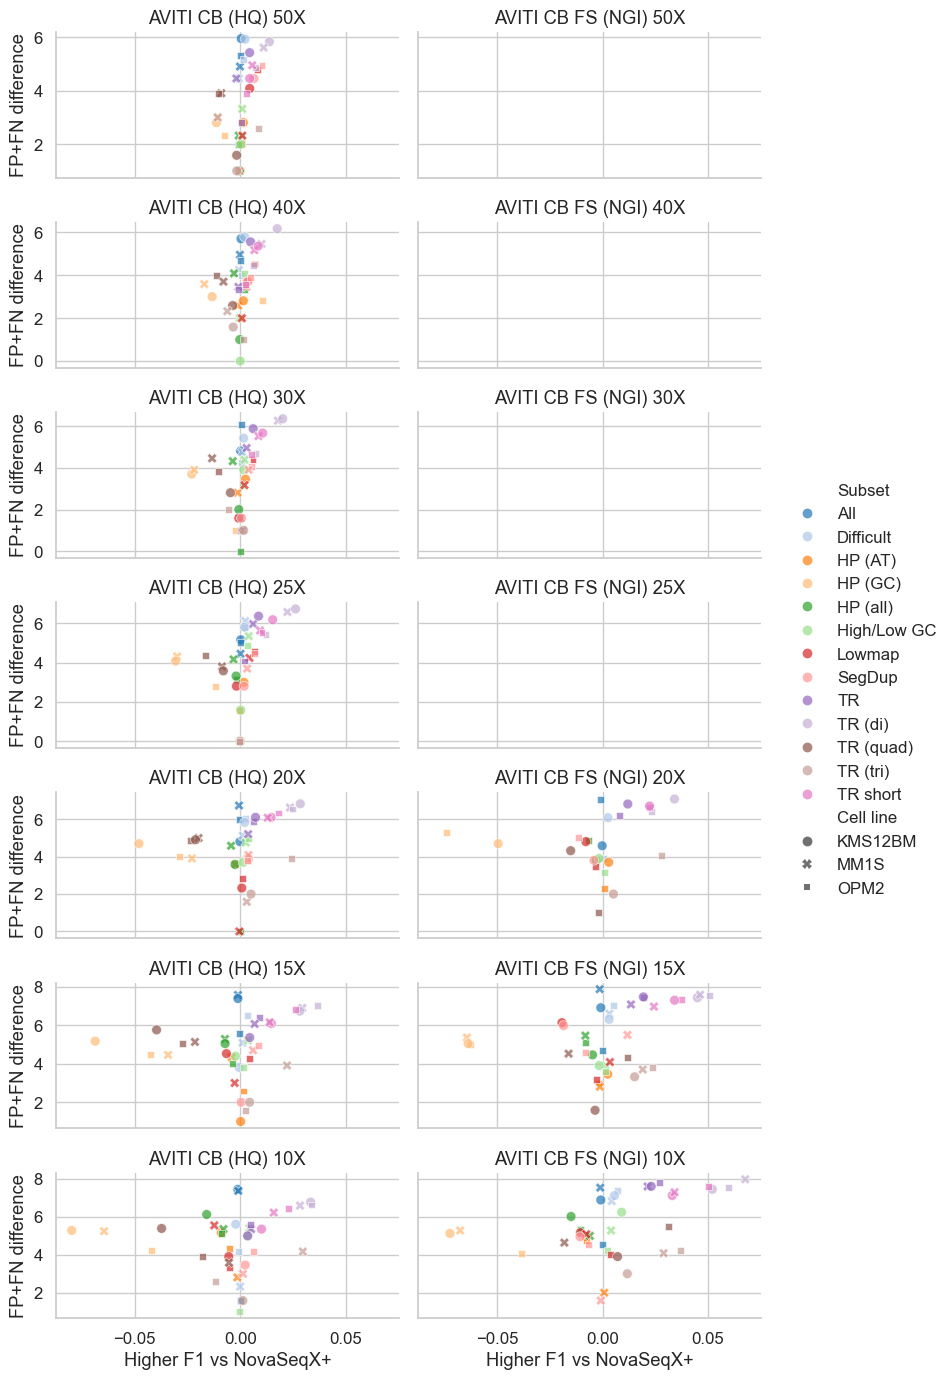

In [141]:
subsets = [
    # '*',
    'AllAutosomes',
    # 'AllHomopolymers_ge7bp_imperfectge11bp_slop5',
    'AllTandemRepeats',
    # 'AllTandemRepeats_201to10000bp_slop5',
    # 'AllTandemRepeats_51to200bp_slop5',
    # 'AllTandemRepeats_ge10001bp_slop5',
    # 'AllTandemRepeats_ge101bp_slop5',
    'AllTandemRepeats_le50bp_slop5',
    # 'AllTandemRepeatsandHomopolymers_slop5',
    # 'BadPromoters',
    # 'CMRGv1.00_duplicationinKMT2C',
    # 'CMRGv1.00_falselyduplicatedgenes',
    # 'KIR',
    # 'L1H_gt500',
    # 'LD_discordant_haplotypes_slop5bp',
    # 'MHC',
    'diTR_10to49_slop5',
    'diTR_50to149_slop5',
    'diTR_ge150_slop5',
    # 'homopolymer_4to6_AT_slop5',
    # 'homopolymer_4to6_GC_slop5',
    # 'homopolymer_4to6_slop5',
    'homopolymer_7to11_AT_slop5',
    'homopolymer_7to11_GC_slop5',
    'homopolymer_7to11_slop5',
    'homopolymer_ge12_AT_slop5',
    'homopolymer_ge12_GC_slop5',
    'homopolymer_ge12_slop5',
    # 'homopolymer_ge21_AT_slop5',
    # 'homopolymer_ge21_GC_slop5',
    # 'homopolymer_ge21_slop5',
    'imperfecthomopolge11_AT_slop5',
    'imperfecthomopolge11_GC_slop5',
    'imperfecthomopolge11_slop5',
    # 'imperfecthomopolge21_AT_slop5',
    # 'imperfecthomopolge21_GC_slop5',
    # 'imperfecthomopolge21_slop5',
    'quadTR_19to49_slop5',
    'quadTR_50to149_slop5',
    'quadTR_ge150_slop5',
    'triTR_14to49_slop5',
    'triTR_50to149_slop5',
    'triTR_ge150_slop5',
    # 'VDJ',
    # 'allOtherDifficultregions',
    'alldifficultregions',
    # 'alllowmapandsegdupregions',
    # 'chrX_PAR',
    # 'chrX_XTR',
    # 'chrX_ampliconic',
    # 'chrX_nonPAR',
    # 'chrY_PAR',
    # 'chrY_XTR',
    # 'chrY_ampliconic',
    # 'chrY_nonPAR',
    # 'collapsed_duplication_FP_regions',
    # 'contigs_lt500kb',
    # 'false_duplications_correct_copy',
    # 'false_duplications_incorrect_copy',
    # 'gaps_slop15kb',
    # 'gc15_slop50',
    # 'gc15to20_slop50',
    # 'gc20to25_slop50',
    # 'gc25to30_slop50',
    # 'gc30to55_slop50',
    # 'gc55to60_slop50',
    # 'gc60to65_slop50',
    # 'gc65to70_slop50',
    # 'gc70to75_slop50',
    # 'gc75to80_slop50',
    # 'gc80to85_slop50',
    # 'gc85_slop50',
    'gclt25orgt65_slop50',
    # 'gclt30orgt55_slop50',
    'lowmappabilityall',
    # 'nonunique_l100_m2_e1',
    # 'nonunique_l250_m0_e0',
    # 'notinAllHomopolymers_ge7bp_imperfectge11bp_slop5',
    # 'notinAllTandemRepeatsandHomopolymers_slop5',
    # 'notinallTandemRepeats',
    # 'notinalldifficultregions',
    # 'notinalllowmapandsegdupregions',
    # 'notinlowmappabilityall',
    # 'notinrefseq_cds',
    # 'notinsatellites_slop5',
    # 'notinsegdups',
    # 'notinsegdups_gt10kb',
    # 'population_CNV_FP_regions',
    # 'refseq_cds',
    # 'satellites_slop5',
    'segdups',
    # 'segdups_gt10kb'
    ]

d = edata[edata["Subset"].isin(subsets)].copy()

group_subsets = {
    "HP (GC)": [
        "homopolymer_7to11_GC_slop5",
        "homopolymer_ge12_GC_slop5",
        "imperfecthomopolge11_GC_slop5",
    ],
    "HP (AT)": [
        "homopolymer_7to11_AT_slop5",
        "homopolymer_ge12_AT_slop5",
        "imperfecthomopolge11_AT_slop5",
    ],
    "HP (all)": [
        "homopolymer_7to11_slop5",
        "homopolymer_ge12_slop5",
        "imperfecthomopolge11_slop5",
    ],
    "TR (di)": [
        "diTR_10to49_slop5",
        "diTR_50to149_slop5",
        "diTR_ge150_slop5",
    ],
    "TR (tri)": [
        "triTR_14to49_slop5",
        "triTR_50to149_slop5",
        "triTR_ge150_slop5",
    ],
    "TR (quad)": [
        "quadTR_19to49_slop5",
        "quadTR_50to149_slop5",
        "quadTR_ge150_slop5",
    ],
    "GC low": [
        "gc15_slop50",
        "gc15to20_slop50",
        "gc20to25_slop50",
    ],
    "GC high": [
        "gc65to70_slop50",
        "gc70to75_slop50",
        "gc75to80_slop50",
        "gc80to85_slop50",
        "gc85_slop50",
    ],
    "High/Low GC": [
        "gclt25orgt65_slop50",
    ],
    "Difficult": [
        "alldifficultregions",
    ],
    "TR": [
        "AllTandemRepeats",
    ],
    "TR short": [
        "AllTandemRepeats_le50bp_slop5",
    ],
    "All": [
        "AllAutosomes",
    ],
    "Lowmap": [
        "lowmappabilityall",
    ],
    "SegDup": [
        "segdups",
    ],
}
subsets_to_group = {v: k for k, vs in group_subsets.items() for v in vs}
d["Subset"] = d["Subset"].replace(subsets_to_group)

#d["Platfrom"] = d["Data source"].str.split(" ").str[0]
d = d.groupby(["Subset", "Cell line", "Data source", "coverage"],as_index=False)\
    .agg({'TRUTH.TOTAL':"sum",'TRUTH.TP':"sum", 'TRUTH.FN':"sum",'QUERY.FP':"sum", "QUERY.TP": "sum"})

d = d[d["TRUTH.TOTAL"] > 0]

d["F1"] = (d["TRUTH.TP"] + d["QUERY.TP"]) / (d["TRUTH.TP"] + d["QUERY.TP"] + d["QUERY.FP"] + d["TRUTH.FN"])
d["FP+FN"] = d["QUERY.FP"] + d["TRUTH.FN"]
d["%FP+FN"] = d.groupby(["Data source", "Cell line", "coverage"])["FP+FN"].transform(lambda x: x/x.max())

d = d.sort_values(by="Data source", ascending=False)
d["F1_gain"] = d.groupby(["Subset", "Cell line", "coverage"])["F1"].transform(
    lambda x: (x-x.iloc[0])
)
d["FP+FN_gain"] = d.groupby(["Subset", "Cell line", "coverage"])["FP+FN"].transform(
    lambda x: np.log2(abs(x.iloc[0]-x)+1)
)
d = d.sort_values(by="Subset", ascending=True)

d = d[d["Data source"] != "NovaSeqX+ (S&S)"]

hue_order=['AVITI CB FS (NGI)', 'AVITI CB (HQ)']
style_order = sorted(d["Cell line"].unique())
g = sns.relplot(d, kind="scatter", y="FP+FN_gain", x="F1_gain", row="coverage", col="Data source", 
                style="Cell line", hue="Subset", palette="tab20", row_order=reversed(sorted(d["coverage"].unique())),
                height=2, aspect=2, s=50, alpha=0.7, style_order=style_order,
                facet_kws=dict(sharey="row", sharex=True))

g.set(
    xlabel="Higher F1 vs NovaSeqX+", 
    ylabel="FP+FN difference",
)

# for s, ax in g.axes_dict.items():
#     # Add the title as an annotation within the plot
#     truth = d[d["Subset"] == s]["TRUTH.TOTAL"].iloc[0]
#     title = f"{s}\n\n(n={truth:,})"
#     ax.text(.95, 0.95, title, transform=ax.transAxes, fontweight="bold", size=11, va="top", ha="right")
#     ax.axhspan(ymin=0, ymax=ylim[1], color="lightgray", alpha=0.3)

g.set_titles("{col_name} {row_name}X")
g.tight_layout()

## ROC

In [709]:
rdata = []
for file in glob.glob(f"happy/pacbio/*roc.all.csv.gz"):
    df = pd.read_csv(file)
    df = df[df["QQ"] != "*"]
    df["QQ"] = df["QQ"].astype(float)
    run = "_".join(file.split("/")[-1].split("_")[:2])
    cell = file.split("/")[-1].split("_")[2]
    cov = file.split("/")[-1].split("_")[3]
    df["run"] = run
    df["cell"] = cell
    df["coverage"] = int(cov[:-1])
    # Skip PacBio reference for REH as low coverage (15X)
    if cell == "REH":
        continue
    rdata.append(df)

rdata = pd.concat(rdata)

rdata = rdata[
    (rdata["Filter"] == "PASS") &\
    (rdata["Subtype"] == "*") &\
    (rdata["Subset"] == "*")
]
#edata = edata.drop(["Filter", "Subtype"], axis=1)
rdata["Data source"] = rdata["run"].replace(run_names)

rdata.head()

Type Subtype Subset Filter Genotype QQ.Field     QQ  METRIC.Recall  \
147  INDEL       *      *   PASS        *       DP    0.0       0.979412   
148  INDEL       *      *   PASS        *       DP   10.0       0.976253   
149  INDEL       *      *   PASS        *       DP  100.0       0.000000   
150  INDEL       *      *   PASS        *       DP  102.0       0.000000   
151  INDEL       *      *   PASS        *       DP  106.0       0.000000   

     METRIC.Precision  METRIC.Frac_NA  ...  QUERY.UNK.ti  QUERY.UNK.tv  \
147          0.978793        0.644032  ...             .             .   
148          0.979260        0.640999  ...             .             .   
149               NaN        1.000000  ...             .             .   
150               NaN        1.000000  ...             .             .   
151               NaN        1.000000  ...             .             .   

     QUERY.UNK.het  QUERY.UNK.homalt  QUERY.UNK.TiTv_ratio  \
147              .                 .                   NaN   
148              .                 .                   NaN   
149              .                 .                   NaN   
150              .                 .                   NaN   
151              .                 .                   NaN   

     QUERY.UNK.het_hom_ratio       run  cell coverage    Data source  
147                      NaN  aviti_hq  MM1S       40  AVITI CB (HQ)  
148                      NaN  aviti_hq  MM1S       40  AVITI CB (HQ)  
149                      NaN  aviti_hq  MM1S       40  AVITI CB (HQ)  
150                      NaN  aviti_hq  MM1S       40  AVITI CB (HQ)  
151                      NaN  aviti_hq  MM1S       40  AVITI CB (HQ)  

[5 rows x 69 columns]

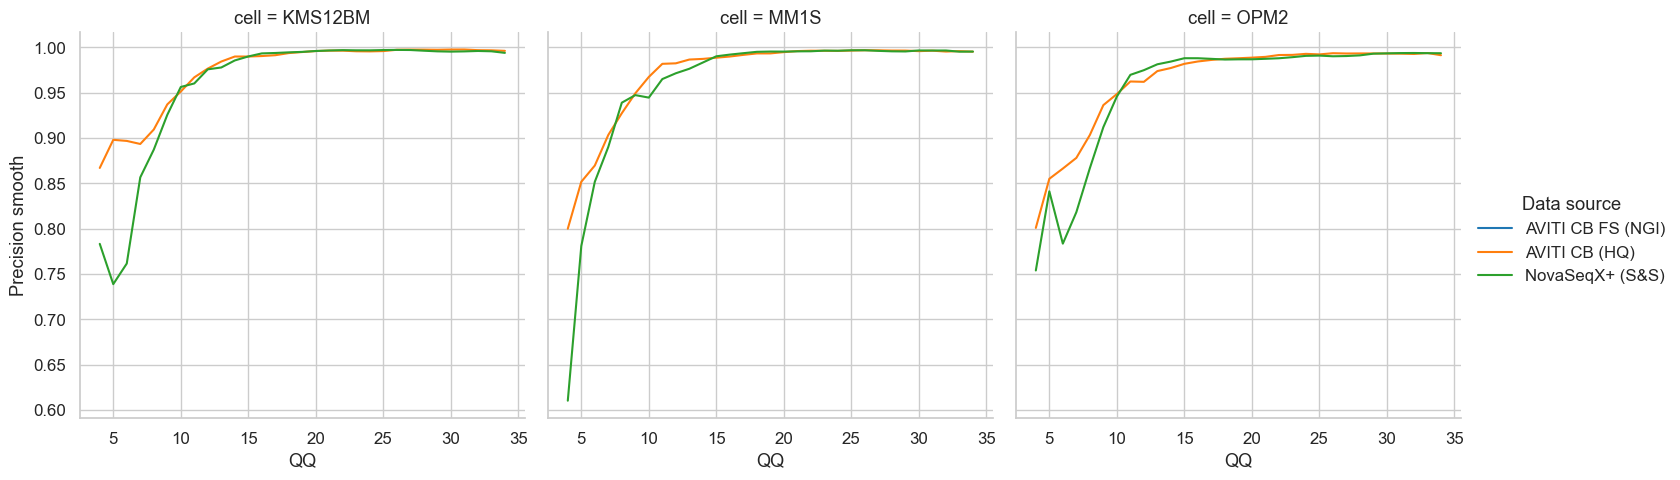

In [710]:
def norm(x):
    arr = x.values
    arrn = arr[:-1] - arr[1:]
    return np.append(arrn, [0])

cov = 25
d = rdata[rdata["coverage"] == cov].copy().reset_index()
d = d[d["QQ.Field"] == "DP"]
d = d.sort_values(by="QQ")
d["TP"] = d.groupby(["Data source", "cell", "Type"])["TRUTH.TP"].transform(norm)
d["FN"] = -d.groupby(["Data source", "cell", "Type"])["TRUTH.FN"].transform(norm)
d["FP"] = d.groupby(["Data source", "cell", "Type"])["QUERY.FP"].transform(norm)

d["QQ"] = d["QQ"].apply(int)
d = d.groupby(["Data source", "cell", "QQ"], as_index=False).agg({"TP":"sum", "FP":"sum", "FN":"sum"})

d["F1"] = 2*d["TP"] / (2*d["TP"] + d["FP"] + d["FN"])
d["Precision"] = d["TP"] / (d["TP"] + d["FP"])
d["F1 smooth"] = d.groupby(["Data source", "cell"])["F1"].transform(lambda x: x.rolling(3, center=True).mean())
d["Precision smooth"] = d.groupby(["Data source", "cell"])["Precision"].transform(lambda x: x.rolling(3, center=True).mean())

#d = d[d[["TP", "FP", "FN"]].sum(axis=1) > 100] 
d = d[(d["QQ"] >= 4) & (d["QQ"] < cov + 10)]
g = sns.relplot(data=d, kind="line",
            hue="Data source", y="Precision smooth", x="QQ", col="cell", #style="Type",
            hue_order=run_names.values(), facet_kws=dict(sharey="row"))
#g.map_dataframe(sns.scatterplot, data=d, y="METRIC.F1_Score", x="QQ", style="Type", hue="Data source", hue_order=run_names.values())
#g.set(ylim=(0,1))


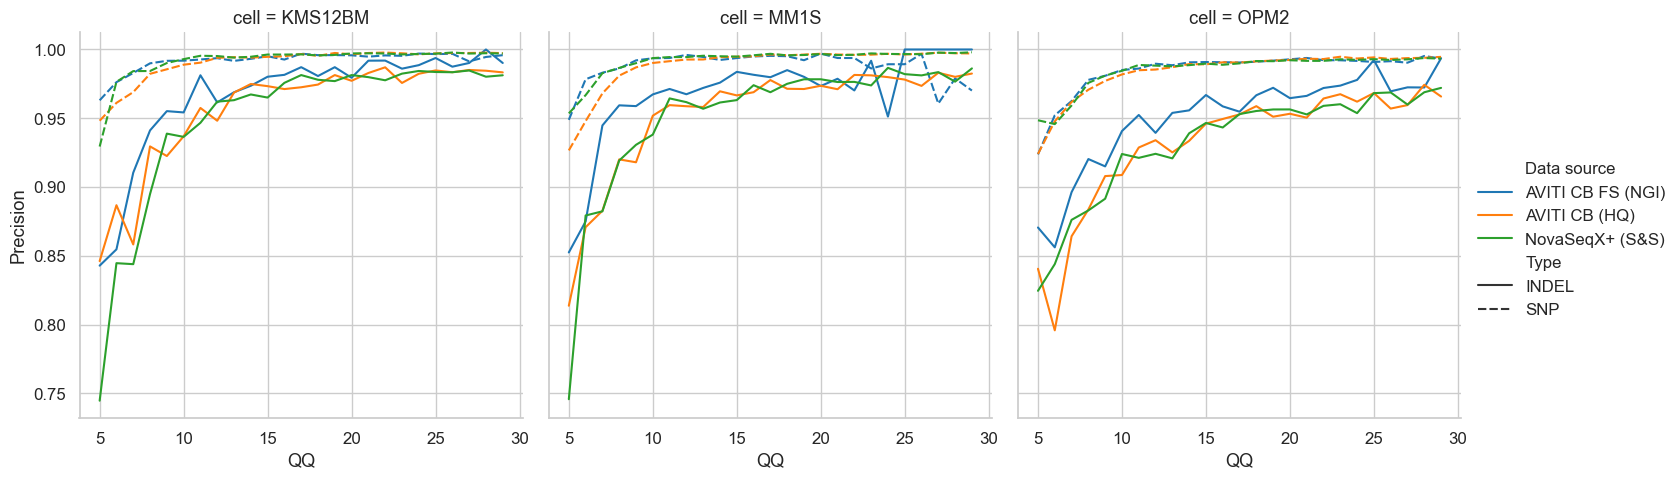

In [711]:
def norm(x):
    arr = x.values
    arrn = arr[:-1] - arr[1:]
    return np.append(arrn, [0])

d = rdata.copy().reset_index()
d = d[d["QQ.Field"] == "DP"]
d = d.sort_values(by="QQ")
d["TP"] = d.groupby(["Data source", "cell", "Type", "coverage"])["TRUTH.TP"].transform(norm)
d["FN"] = -d.groupby(["Data source", "cell", "Type", "coverage"])["TRUTH.FN"].transform(norm)
d["FP"] = d.groupby(["Data source", "cell", "Type", "coverage"])["QUERY.FP"].transform(norm)

d = d.groupby(["Data source", "cell", "Type", "QQ"], as_index=False).agg({"TP":"sum", "FP":"sum", "FN":"sum"})

d["F1"] = 2*d["TP"] / (2*d["TP"] + d["FP"] + d["FN"])
d["F1 smooth"] = d.groupby(["Data source", "cell", "Type"])["F1"].transform(lambda x: x.rolling(5, center=True).mean())
d["Precision"] = d["TP"] / (d["TP"] + d["FP"])
d["Precision smooth"] = d.groupby(["Data source", "cell", "Type"])["Precision"].transform(lambda x: x.rolling(3, center=True).mean())

#d = d[d[["TP", "FP", "FN"]].sum(axis=1) > 100] 
d = d[(d["QQ"] >= 5) & (d["QQ"] < 30)]
g = sns.relplot(data=d, kind="line",
            hue="Data source", y="Precision", x="QQ", col="cell", style="Type",
            hue_order=run_names.values(), facet_kws=dict(sharey="row"))
#g.map_dataframe(sns.scatterplot, data=d, y="METRIC.F1_Score", x="QQ", style="Type", hue="Data source", hue_order=run_names.values())
#g.set(ylim=(0,1))


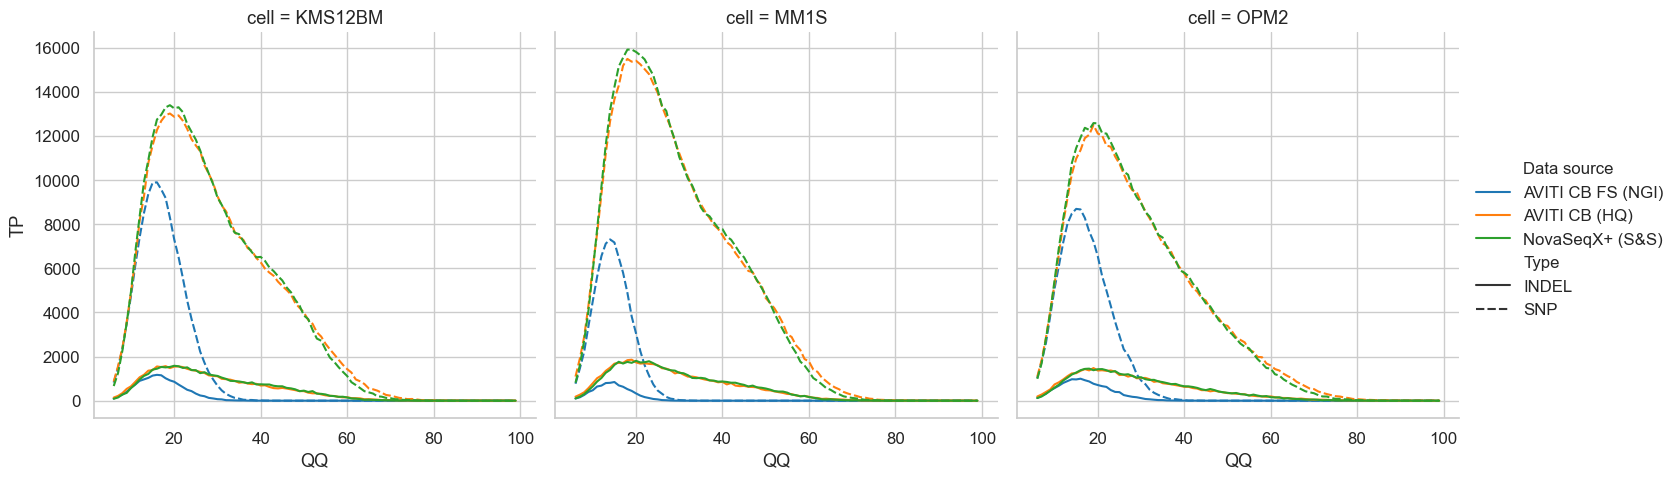

In [712]:
def norm(x):
    arr = x.values
    arrn = arr[:-1] - arr[1:]
    return np.append(arrn, [0])

d = rdata.copy().reset_index()
d = d[d["QQ.Field"] == "DP"]
d = d.sort_values(by="QQ")
d["TP"] = d.groupby(["Data source", "cell", "Type", "coverage"])["TRUTH.TP"].transform(norm)
d["FN"] = -d.groupby(["Data source", "cell", "Type", "coverage"])["TRUTH.FN"].transform(norm)
d["FP"] = d.groupby(["Data source", "cell", "Type", "coverage"])["QUERY.FP"].transform(norm)

d = d.groupby(["Data source", "cell", "Type", "QQ"], as_index=False).agg({"TP":"sum", "FP":"sum", "FN":"sum"})

d["F1"] = 2*d["TP"] / (2*d["TP"] + d["FP"] + d["FN"])
d["F1 smooth"] = d.groupby(["Data source", "cell", "Type"])["F1"].transform(lambda x: x.rolling(5, center=True).mean())
d["Precision"] = d["TP"] / (d["TP"] + d["FP"])
d["Precision smooth"] = d.groupby(["Data source", "cell", "Type"])["Precision"].transform(lambda x: x.rolling(3, center=True).mean())

#d = d[d[["TP", "FP", "FN"]].sum(axis=1) > 100] 
d = d[(d["QQ"] > 5) & (d["QQ"] < 100)]
g = sns.relplot(data=d, kind="line",
            hue="Data source", y="TP", x="QQ", col="cell", style="Type",
            hue_order=run_names.values(), facet_kws=dict(sharey="row"))
#g.map_dataframe(sns.scatterplot, data=d, y="METRIC.F1_Score", x="QQ", style="Type", hue="Data source", hue_order=run_names.values())
#g.set(ylim=(0,1))
